# Caricamento Dataset e principali imports

In [ ]:
from google.colab import drive
import numpy as np
import sklearn as sn
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount('/content/drive/')

df = pd.read_csv("drive/MyDrive/diabetes_data.csv")

Mounted at /content/drive/


# Riduzione Dataset

Il codice riduce le dimensioni del dataset originale per migliorare i tempi di addestramento. Viene creato un nuovo dataset ridotto, chiamato `sampled_df`, che preserva la proporzione delle classi attraverso lo stratified sampling. L'analisi della distribuzione delle feature mostra visivamente che questa riduzione non influenza significativamente le caratteristiche del dataset originale, mantenendo intatte le proporzioni delle classi.

Original distribution:
0.0    35346
1.0    35346
Name: Diabetes, dtype: int64

Stratified distribution:
0.0    10000
1.0    10000
Name: Diabetes, dtype: int64

Number of rows original dataset: 70692
Number of rows stratified dataset: 20000


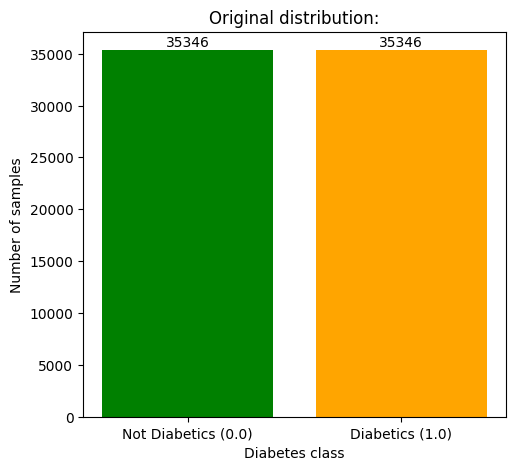

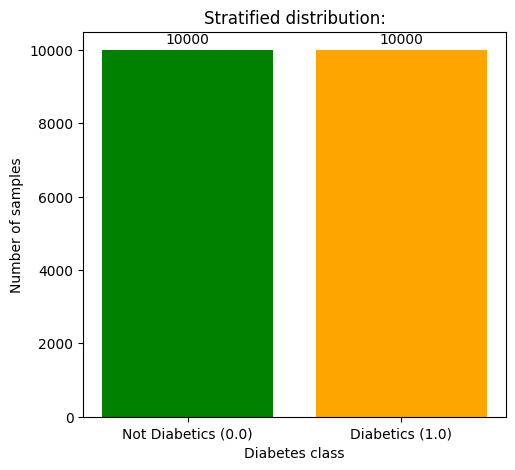

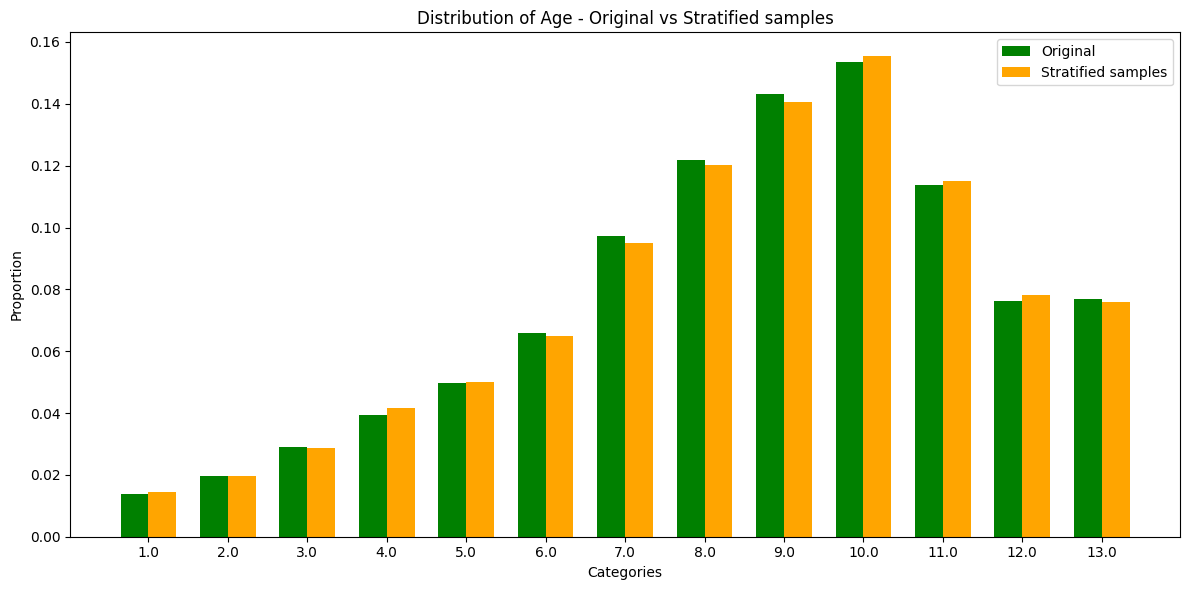

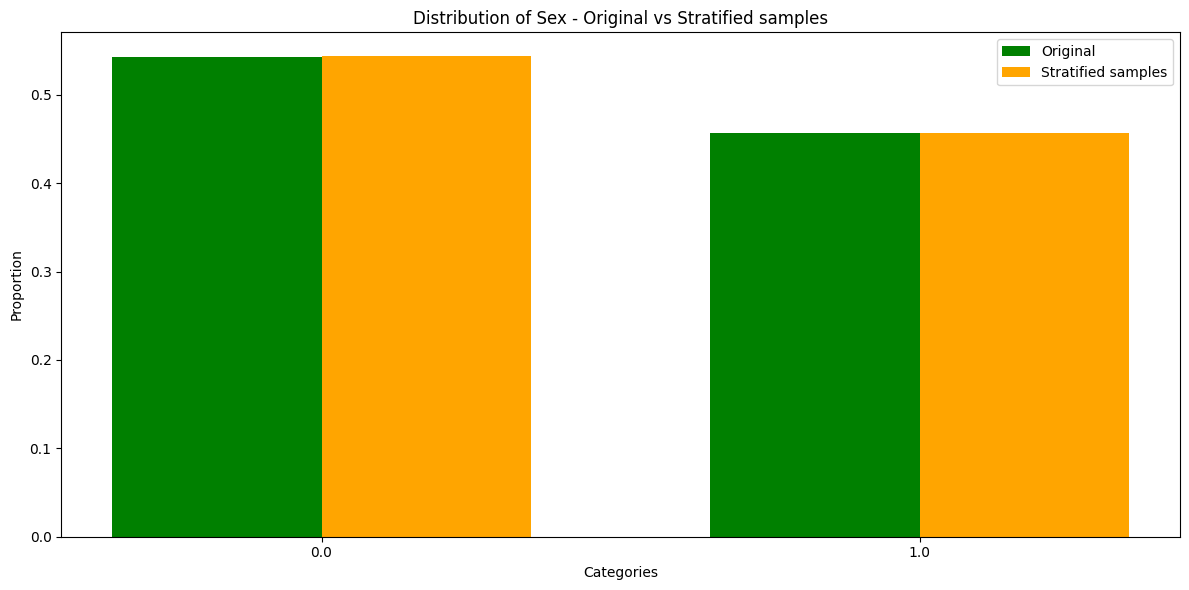

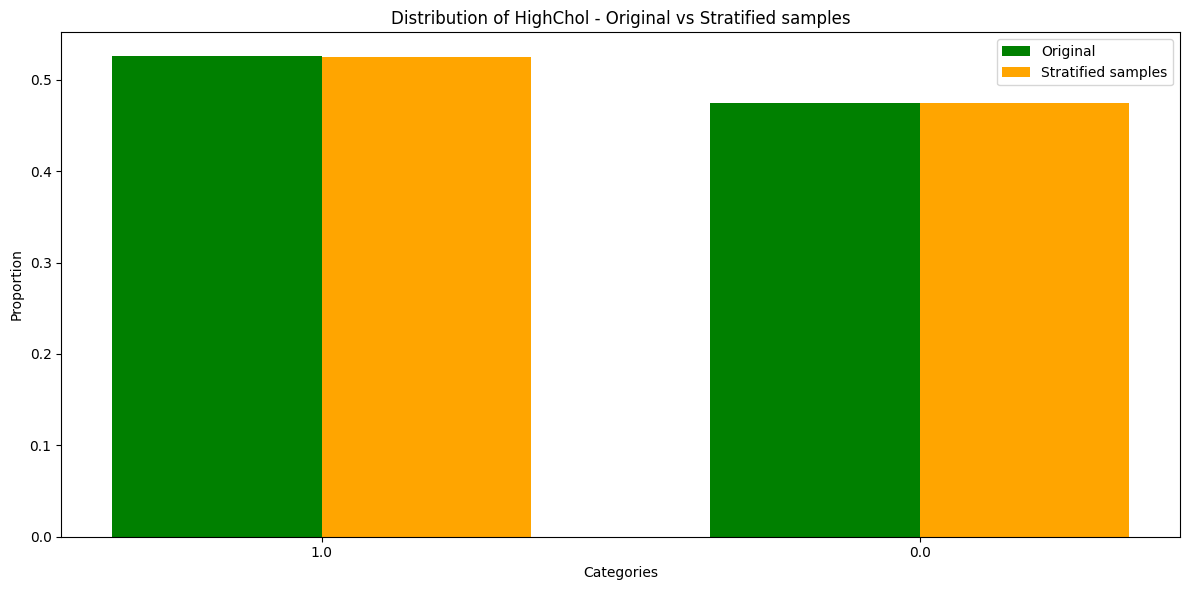

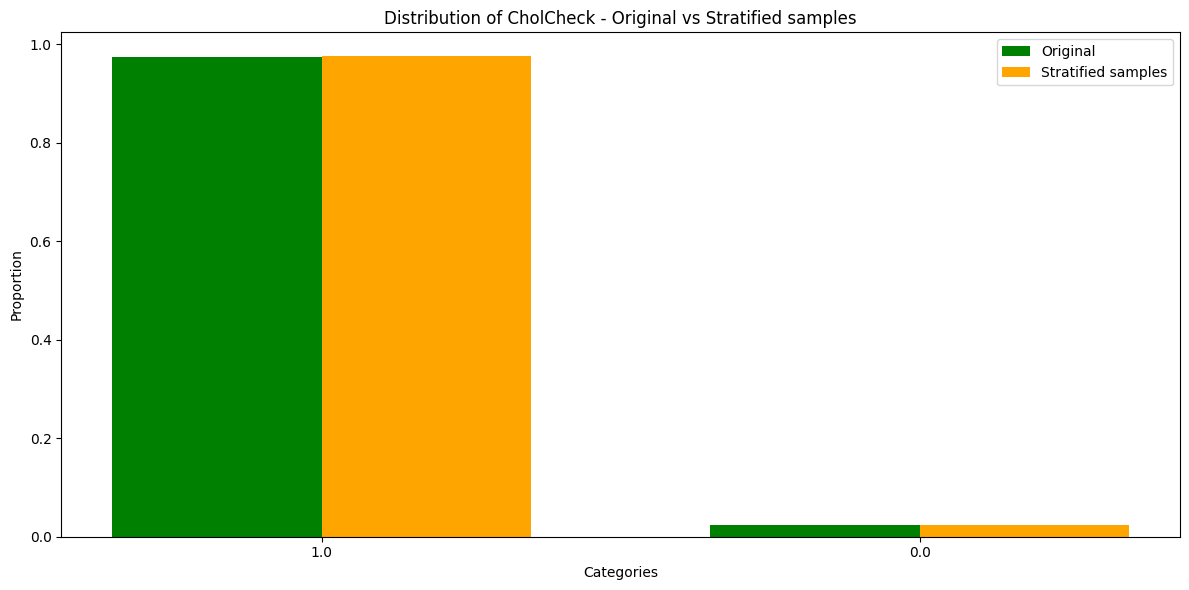

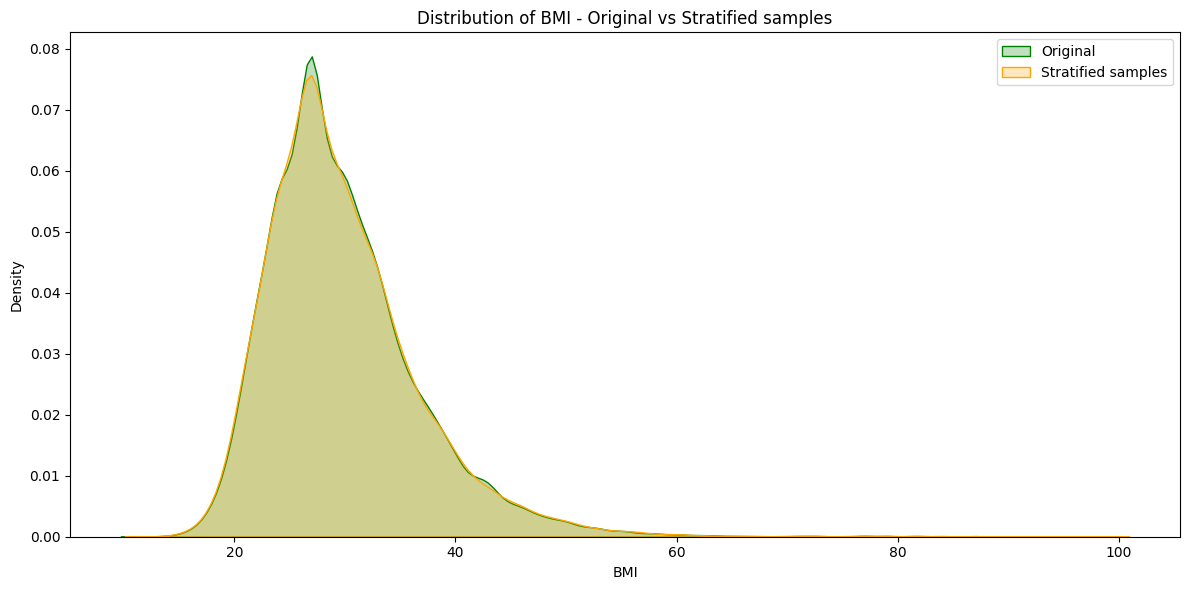

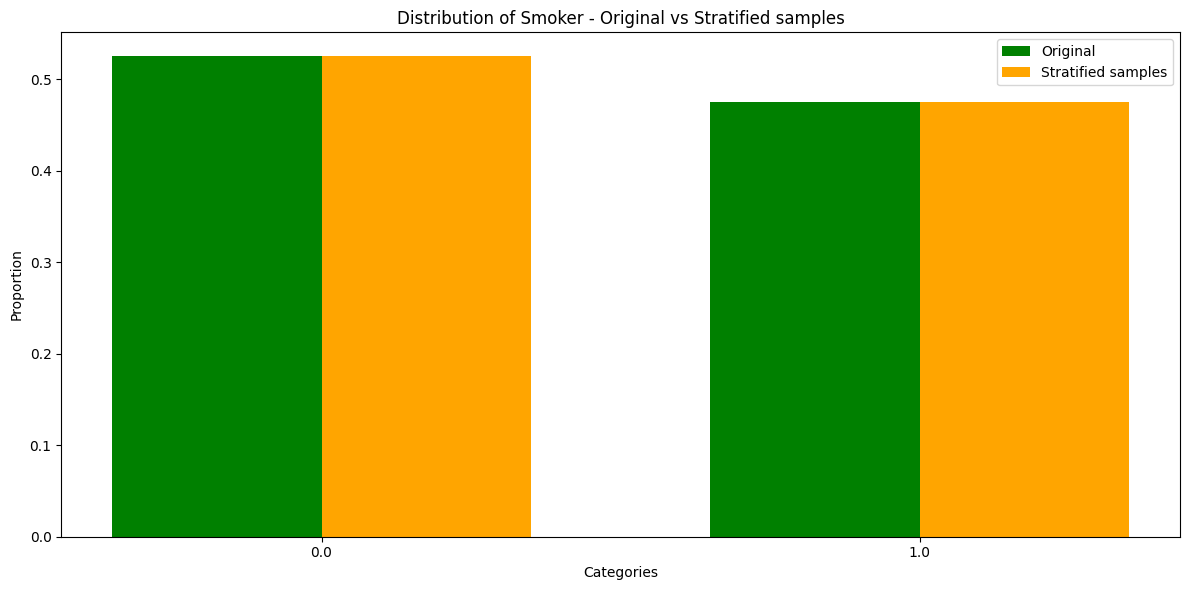

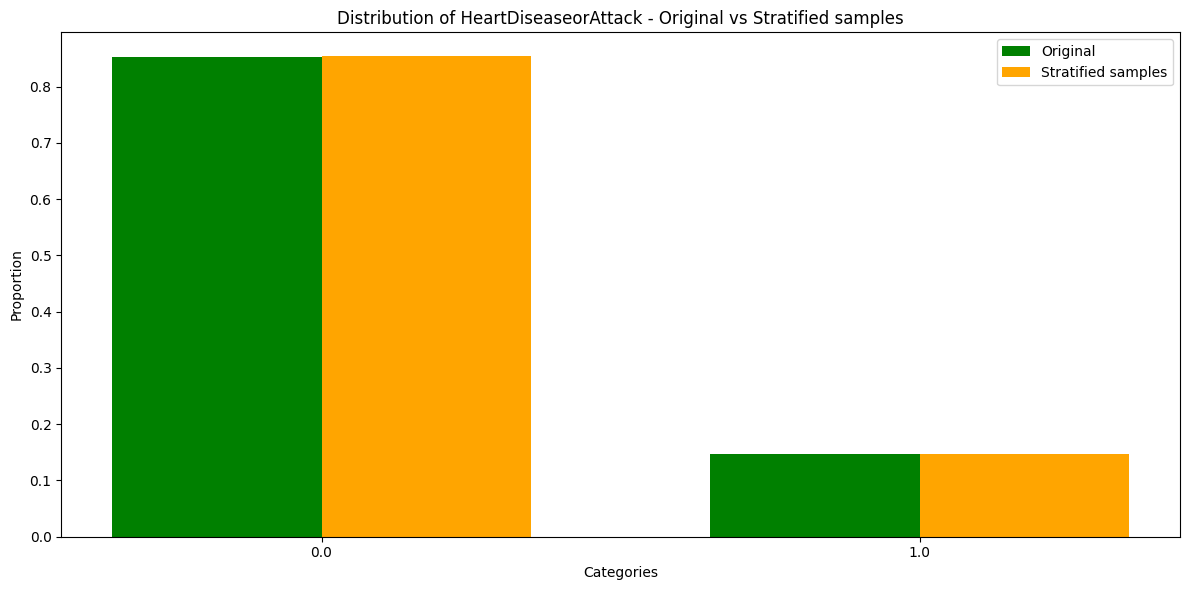

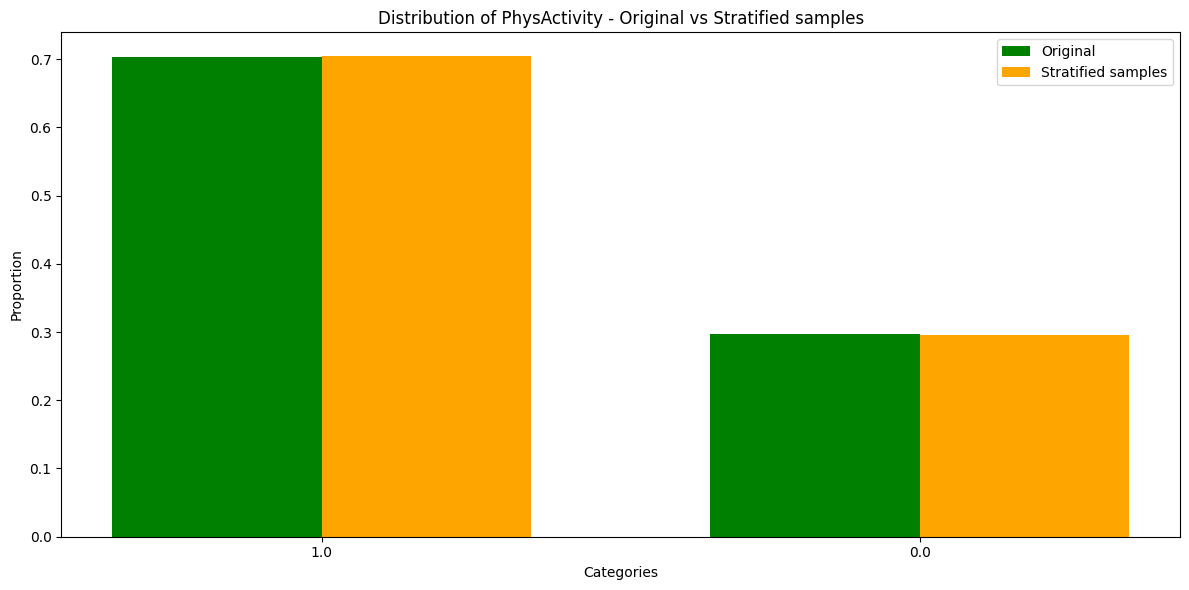

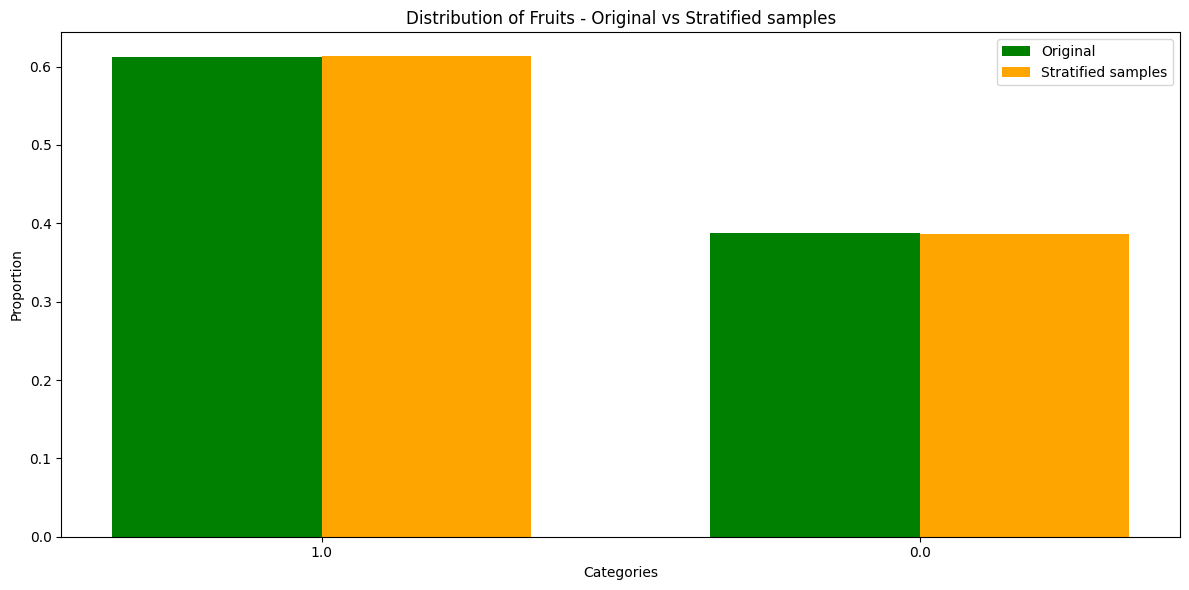

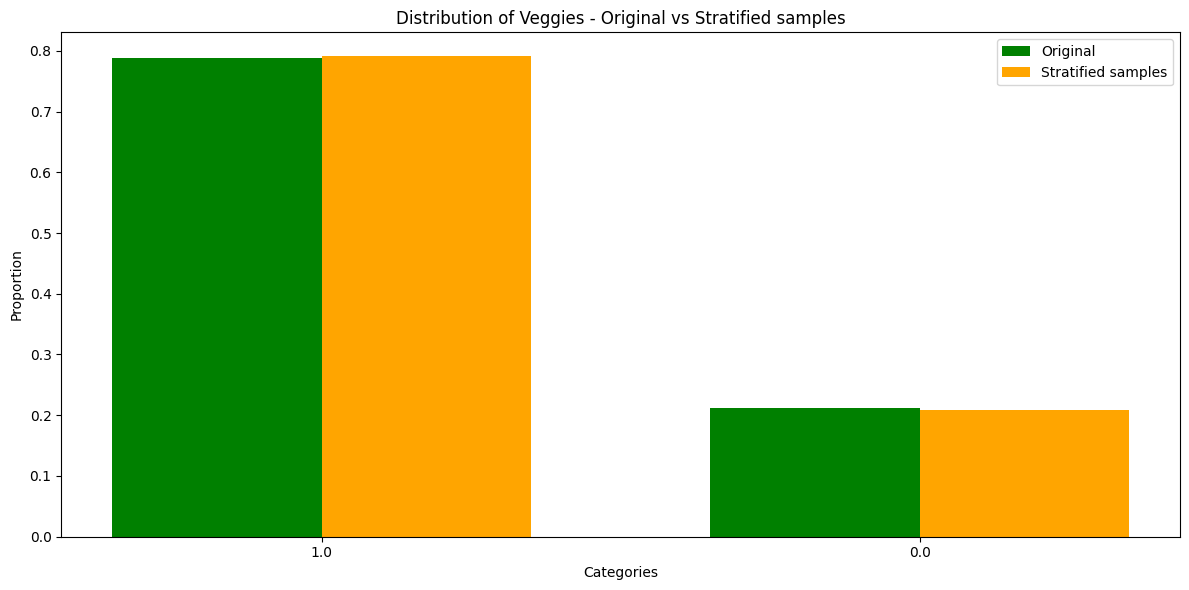

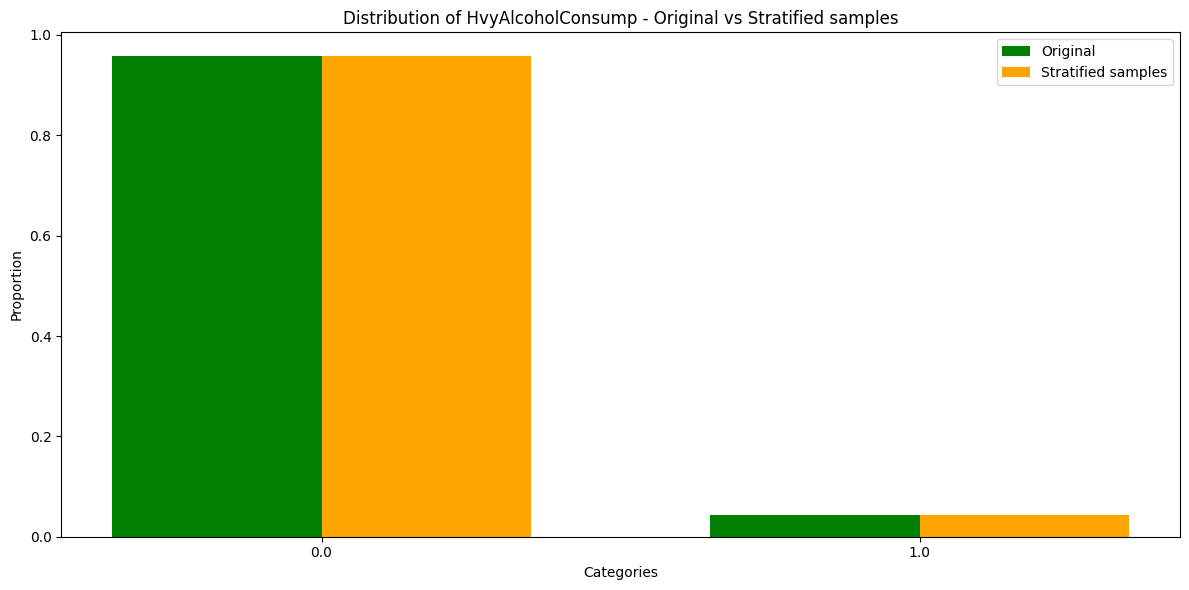

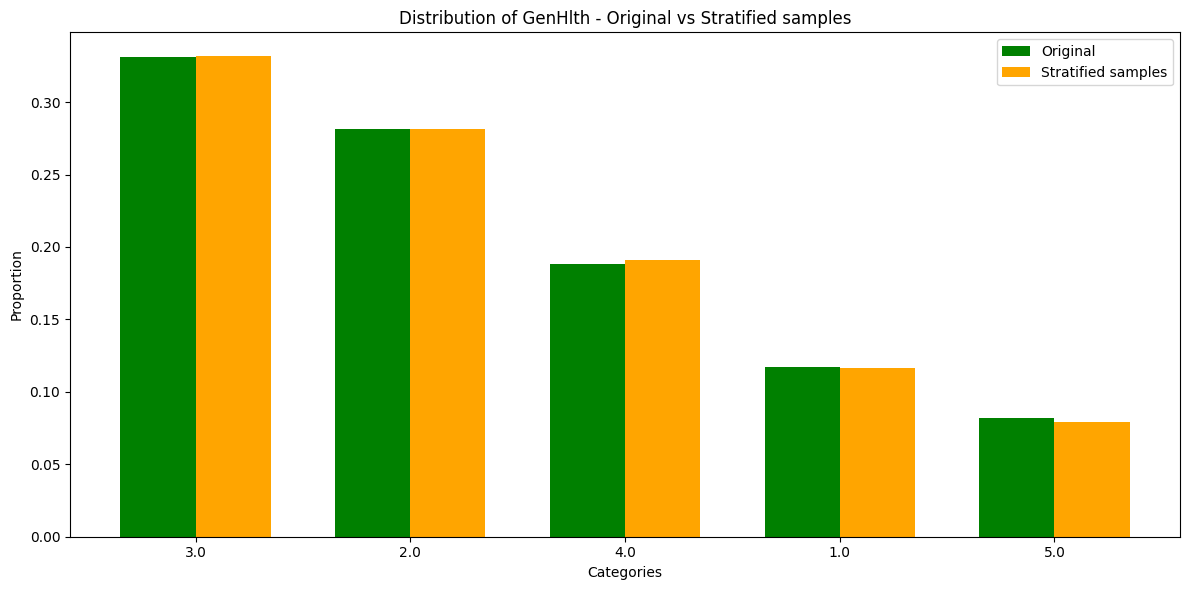

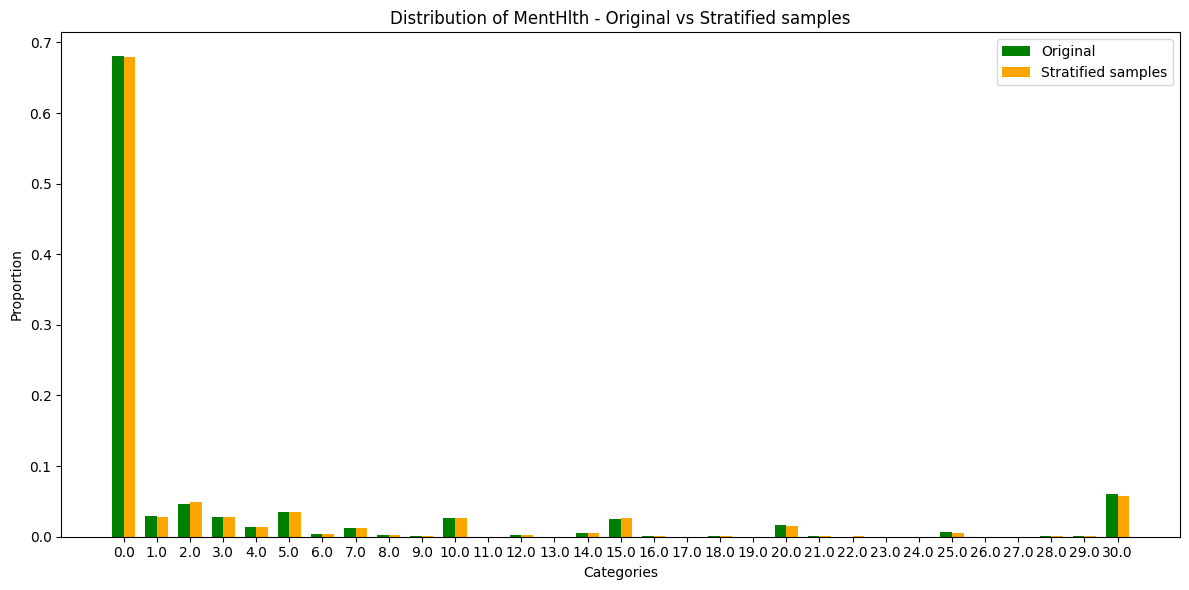

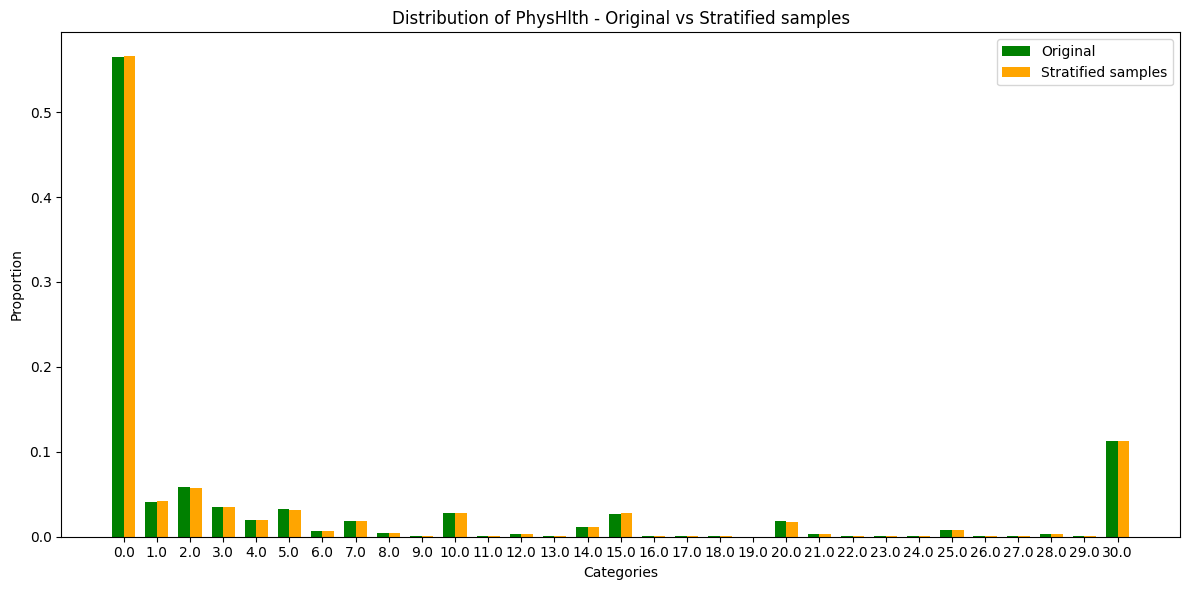

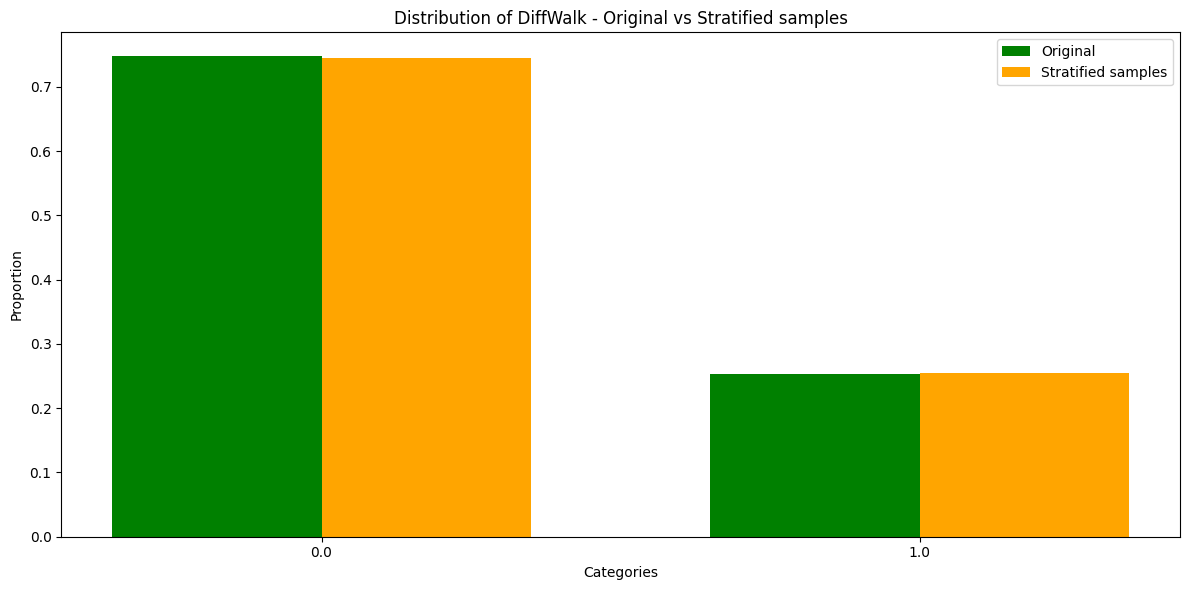

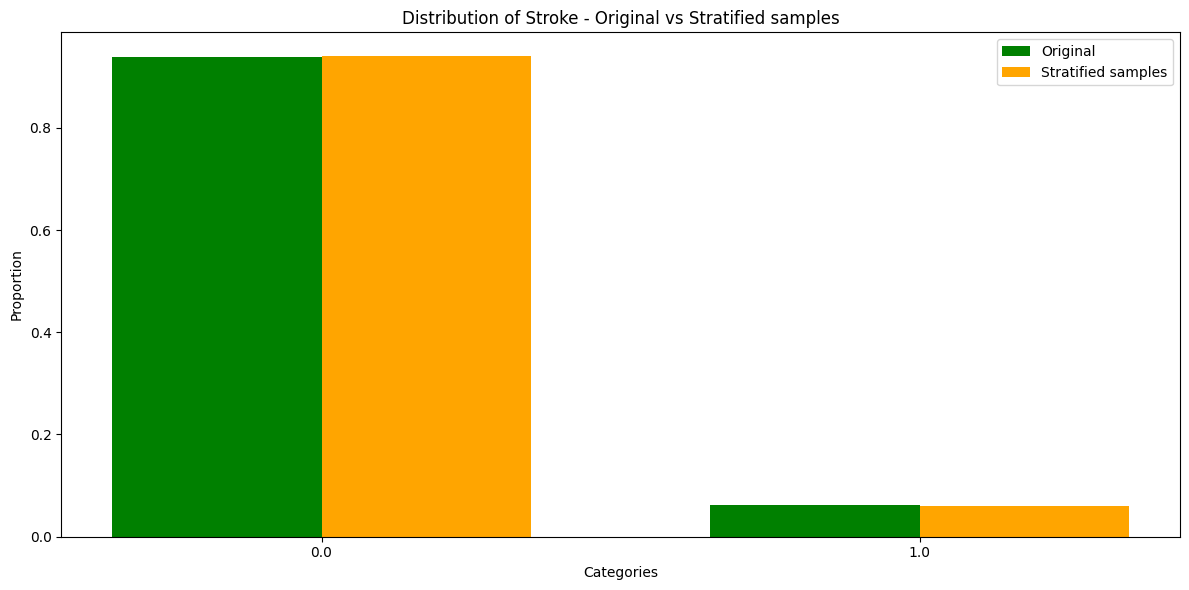

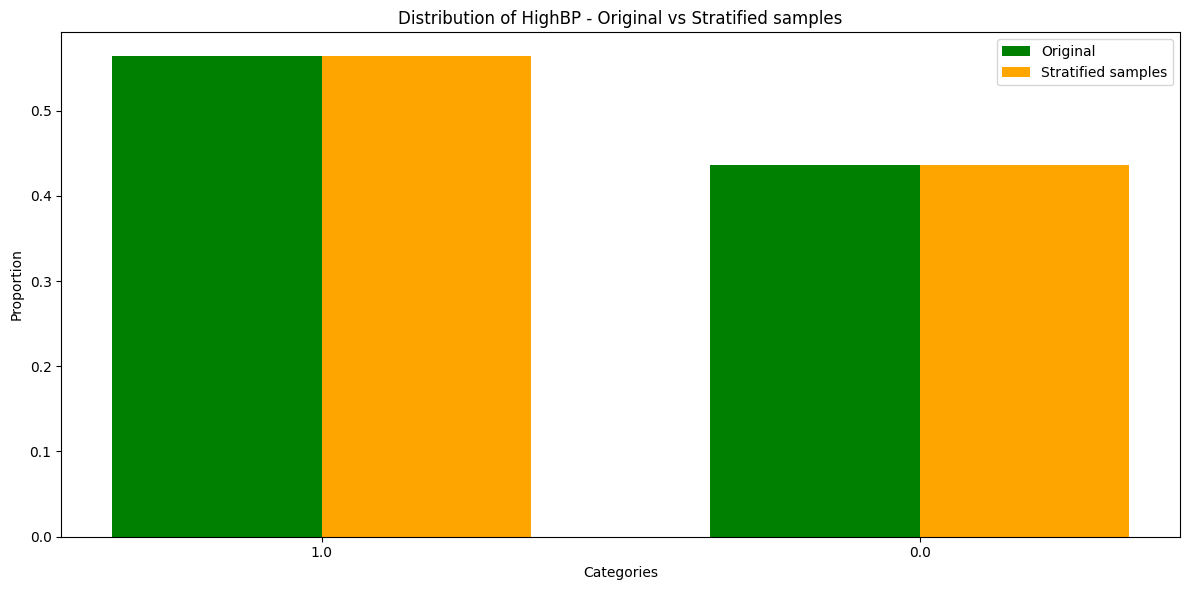

In [ ]:
import seaborn as sns

# Original dataset counts
original_counts = df['Diabetes'].value_counts()

# Print information about the original dataset
print("Original distribution:")
print(original_counts)

# Plot the original distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
bars = plt.bar(original_counts.index, original_counts.values, color=['green', 'orange'])
plt.title('Original distribution:')
plt.xlabel('Diabetes class')
plt.ylabel('Number of samples')
plt.xticks(original_counts.index, ['Not Diabetics (0.0)', 'Diabetics (1.0)'])

# Add numeric values above the bars in the first plot
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100, round(yval), ha='center', va='bottom', color='black')

# Stratified sampling
# Split the dataset based on the 'Diabetes' variable
df_group_0 = df[df['Diabetes'] == 0]
df_group_1 = df[df['Diabetes'] == 1]

# Specify the desired sample size for each group
sample_size_per_group = 20000 // 2  # Divide equally between classes

# Perform stratified random sampling for both groups
sampled_group_0 = df_group_0.sample(n=sample_size_per_group, random_state=42)
sampled_group_1 = df_group_1.sample(n=sample_size_per_group, random_state=42)

# Combine the samples to get the stratified dataset
sampled_df = pd.concat([sampled_group_0, sampled_group_1])

# Counts in the stratified dataset
stratified_counts = sampled_df['Diabetes'].value_counts()

# Print information about the stratified dataset
print("\nStratified distribution:")
print(stratified_counts)

print("\nNumber of rows original dataset:", df.shape[0])
print("Number of rows stratified dataset:", sampled_df.shape[0])

# Plot the stratified distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
bars = plt.bar(stratified_counts.index, stratified_counts.values, color=['green', 'orange'])
plt.title('Stratified distribution:')
plt.xlabel('Diabetes class')
plt.ylabel('Number of samples')
plt.xticks(stratified_counts.index, ['Not Diabetics (0.0)', 'Diabetics (1.0)'])

# Add numeric values above the bars in the first plot
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100, round(yval), ha='center', va='bottom', color='black')


feature_columns = [col for col in df.columns if col != 'Diabetes']

# Plot the old and new distributions for each feature
for feature in feature_columns:
    # For BMI feature, use KDE plot
    if feature == 'BMI':
        plt.figure(figsize=(12, 6))
        sns.kdeplot(data=df[feature], label='Original', color='green', fill = True)
        sns.kdeplot(data=sampled_df[feature], label='Stratified samples', color='orange', fill = True)
        plt.xlabel('BMI')
        plt.ylabel('Density')
        plt.title(f'Distribution of {feature} - Original vs Stratified samples')
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        # Calculate the distribution of the feature in the original dataset
        original_feature_counts = df[feature].value_counts(normalize=True)

        # Calculate the distribution of the feature in the stratified sampled dataset
        sampled_feature_counts = sampled_df[feature].value_counts(normalize=True)

        # Create bars for the plot
        categories = original_feature_counts.index.union(sampled_feature_counts.index)
        indices = np.arange(len(categories))
        bar_width = 0.35

        # Plot the distributions
        plt.figure(figsize=(12, 6))
        plt.bar(indices, original_feature_counts.reindex(categories, fill_value=0), bar_width, label='Original', color="green")
        plt.bar(indices + bar_width, sampled_feature_counts.reindex(categories, fill_value=0), bar_width, label='Stratified samples', color="orange")

        # Add labels, title, and legend
        plt.xlabel('Categories')
        plt.ylabel('Proportion')
        plt.title(f'Distribution of {feature} - Original vs Stratified samples')

        # Rotate x-labels for BMI feature
        if feature == 'BMI':
            plt.xticks(indices[::2] + bar_width / 2, categories[::2], rotation=45)
        else:
            plt.xticks(indices + bar_width / 2, categories)
        plt.legend()

        # Show the plot
        plt.tight_layout()
        plt.show()


# Descrizione Generale Dataset

In [ ]:
sampled_df.dtypes

Age                     float64
Gender                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Stroke                  float64
HighBP                  float64
Diabetes                float64
dtype: object

In [ ]:
sampled_df.head()

,Age,Gender,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
19946,9.0,0.0,1.0,1.0,53.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0
2448,5.0,0.0,0.0,1.0,18.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
21135,2.0,0.0,0.0,1.0,18.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
21718,12.0,1.0,0.0,1.0,28.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0
4984,5.0,1.0,0.0,1.0,24.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
sampled_df.describe()

,Age,Gender,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000
mean,8.582600,0.456500,0.525050,0.975650,29.850300,0.47525,0.146300,0.703950,0.613100,0.790850,0.042700,2.833950,3.659650,5.781800,0.25480,0.060200,0.563550,0.500000
std,2.867471,0.498117,0.499385,0.154137,7.112441,0.49940,0.353416,0.456525,0.487053,0.406712,0.202185,1.108079,7.996318,10.045757,0.43576,0.237863,0.495957,0.500013
min,1.000000,0.000000,0.000000,0.000000,13.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.00000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.00000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,5.000000,1.00000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.00000,1.000000,1.000000,1.000000


In [ ]:
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 19946 to 49789
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   20000 non-null  float64
 1   Gender                20000 non-null  float64
 2   HighChol              20000 non-null  float64
 3   CholCheck             20000 non-null  float64
 4   BMI                   20000 non-null  float64
 5   Smoker                20000 non-null  float64
 6   HeartDiseaseorAttack  20000 non-null  float64
 7   PhysActivity          20000 non-null  float64
 8   Fruits                20000 non-null  float64
 9   Veggies               20000 non-null  float64
 10  HvyAlcoholConsump     20000 non-null  float64
 11  GenHlth               20000 non-null  float64
 12  MentHlth              20000 non-null  float64
 13  PhysHlth              20000 non-null  float64
 14  DiffWalk              20000 non-null  float64
 15  Stroke         

Il dataset non presenta valori mancanti

# Prime operazioni sul dataset

Conversione da float ad int , in quanto le features non presentano valori decimali

In [ ]:
sampled_df = sampled_df.astype(int)

Controllo presenza di valori nulli

In [ ]:
sampled_df.isnull().sum().any()

False

Controllo presenza valori duplicati

In [ ]:
sampled_df.duplicated().sum()

810

In [ ]:
sampled_df = sampled_df.drop_duplicates()

Rinomina della colonna Gender in Sex

In [ ]:
sampled_df.rename(columns={'Sex': 'Gender'}, inplace=True)

<ipython-input-7-14bca7bed063>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_df.rename(columns={'Sex': 'Gender'}, inplace=True)


# Analisi statistica univariata

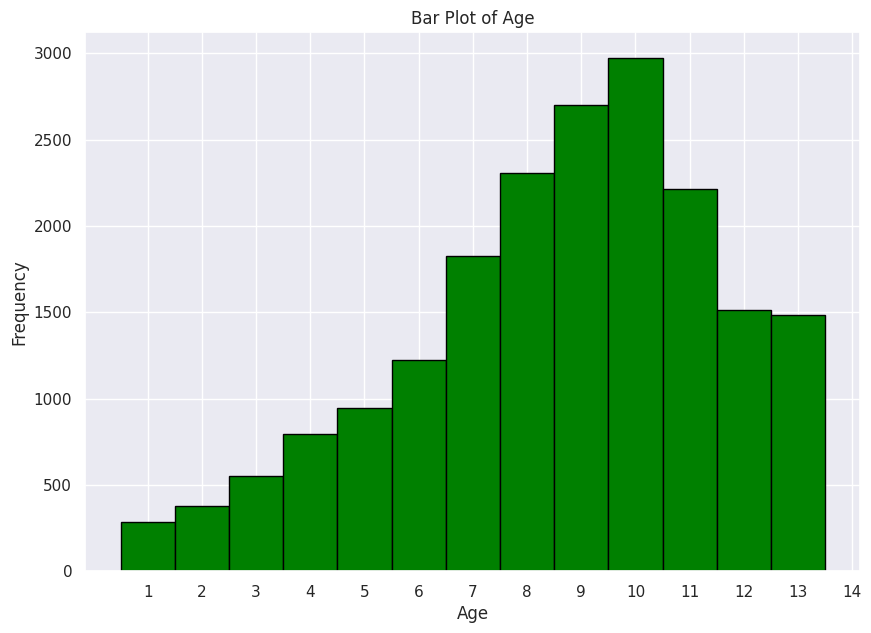

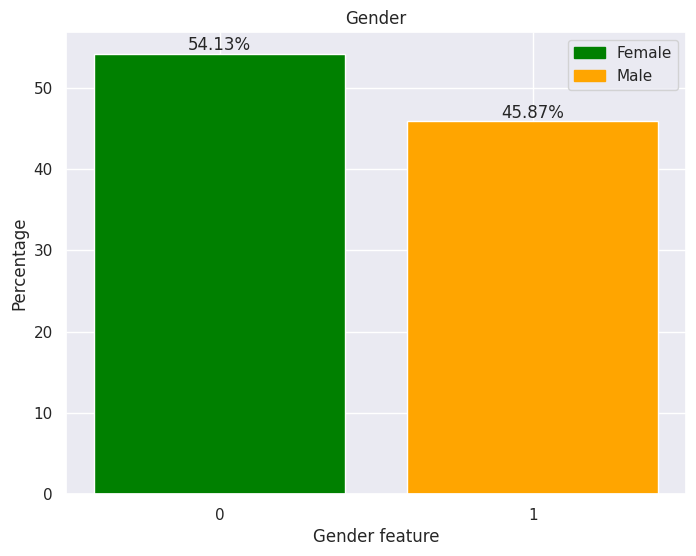

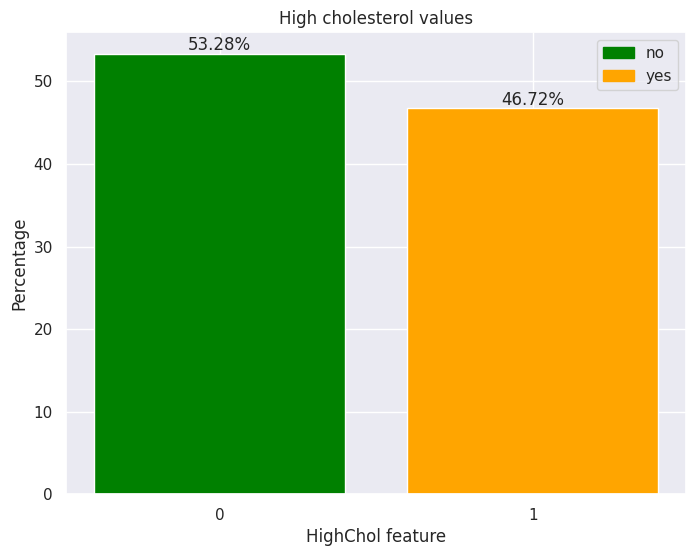

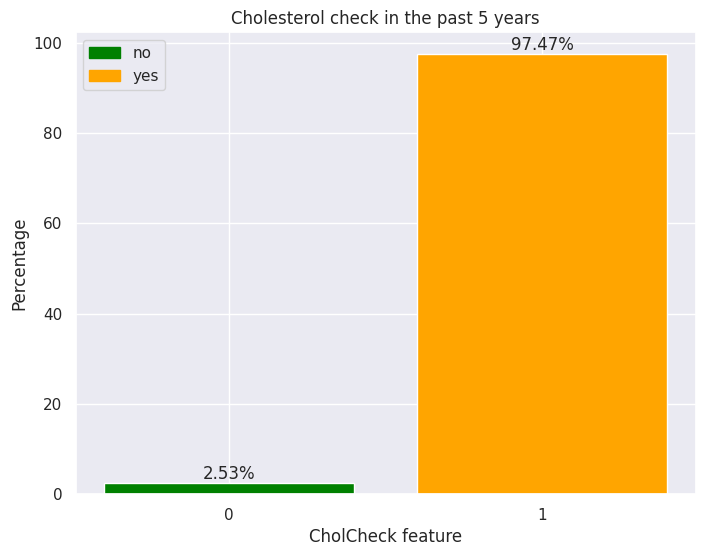

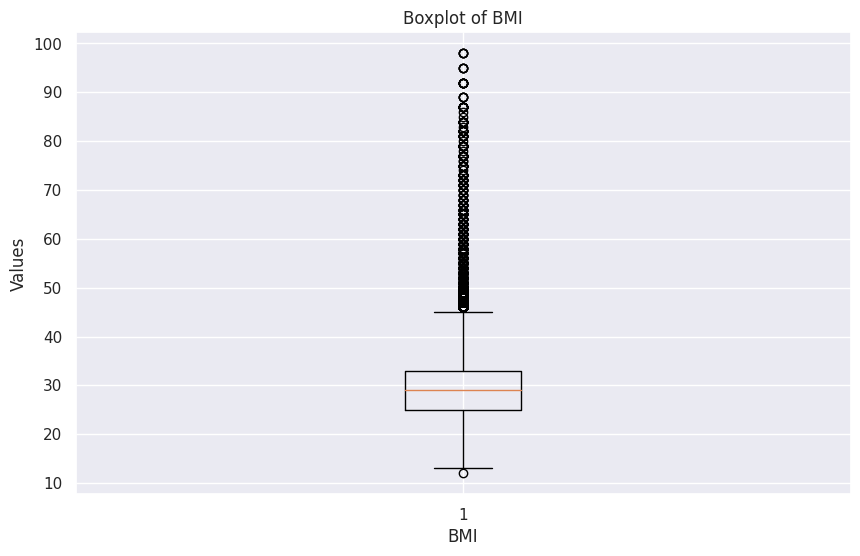

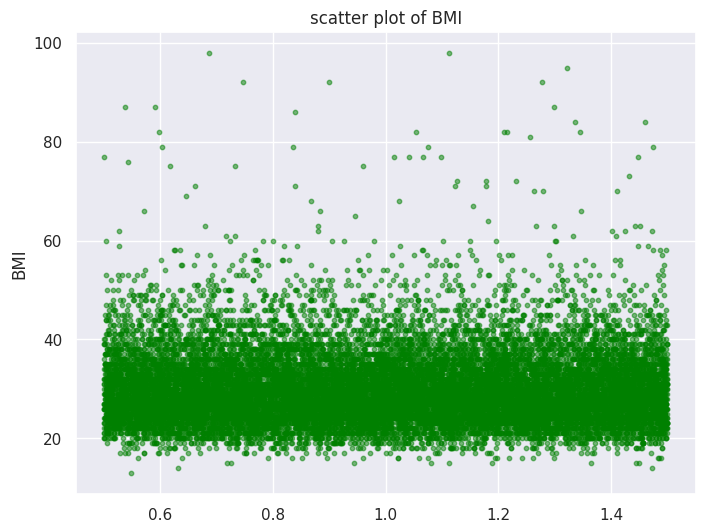

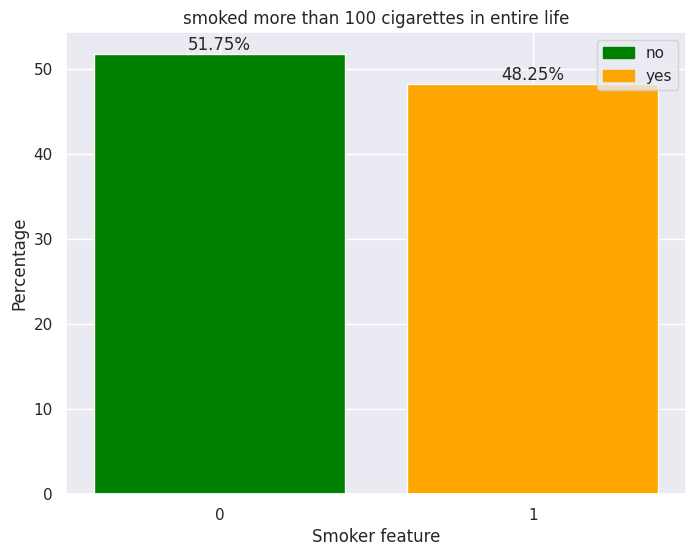

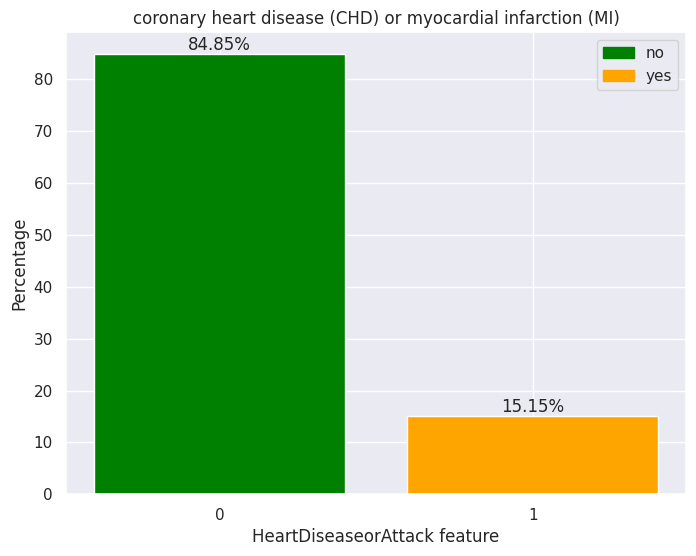

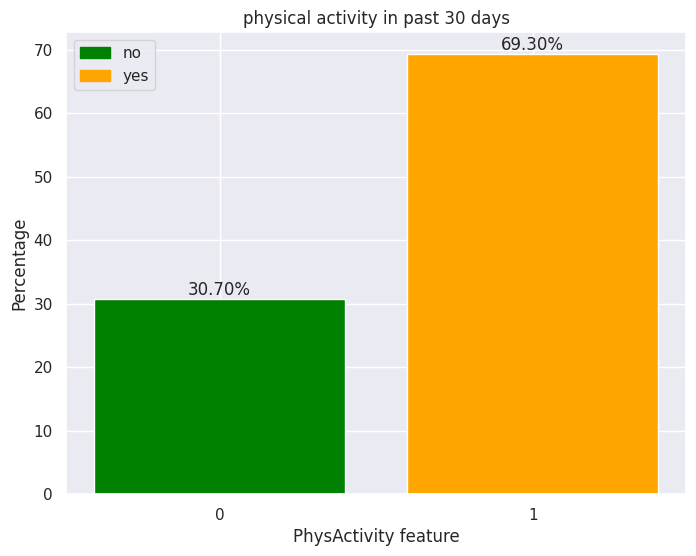

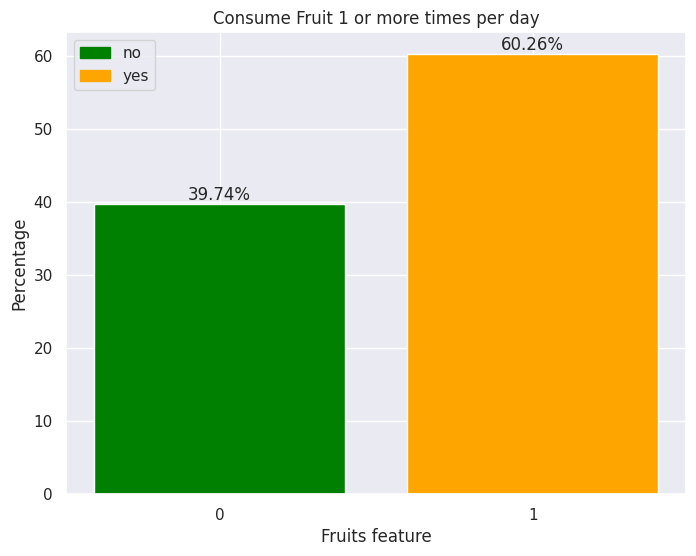

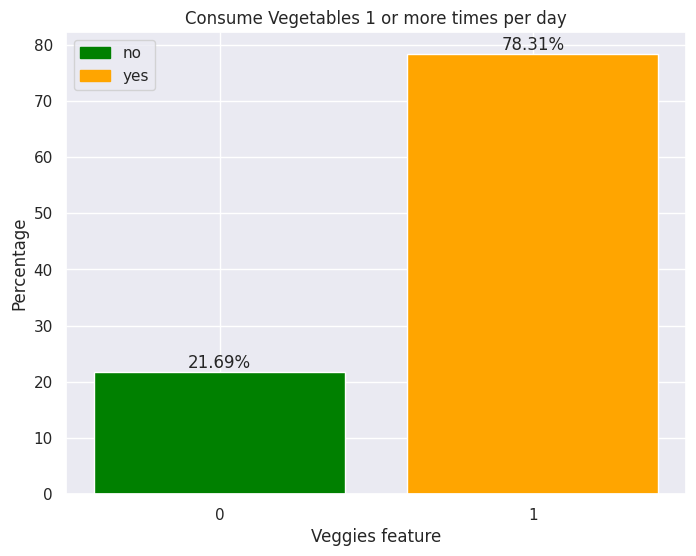

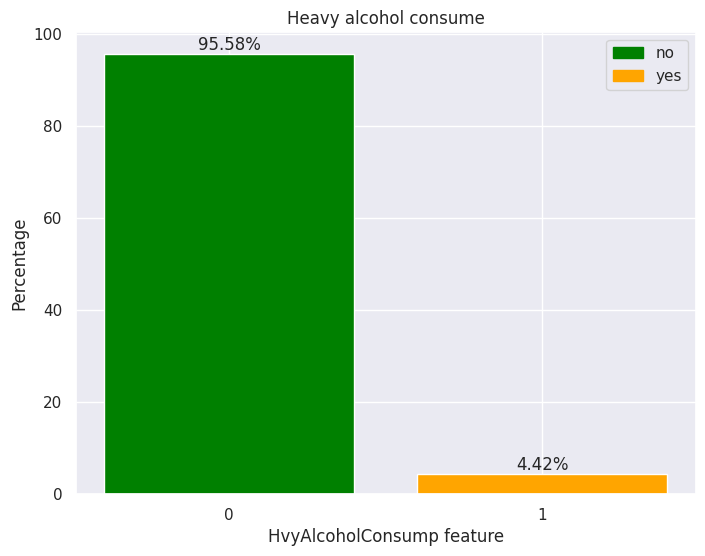

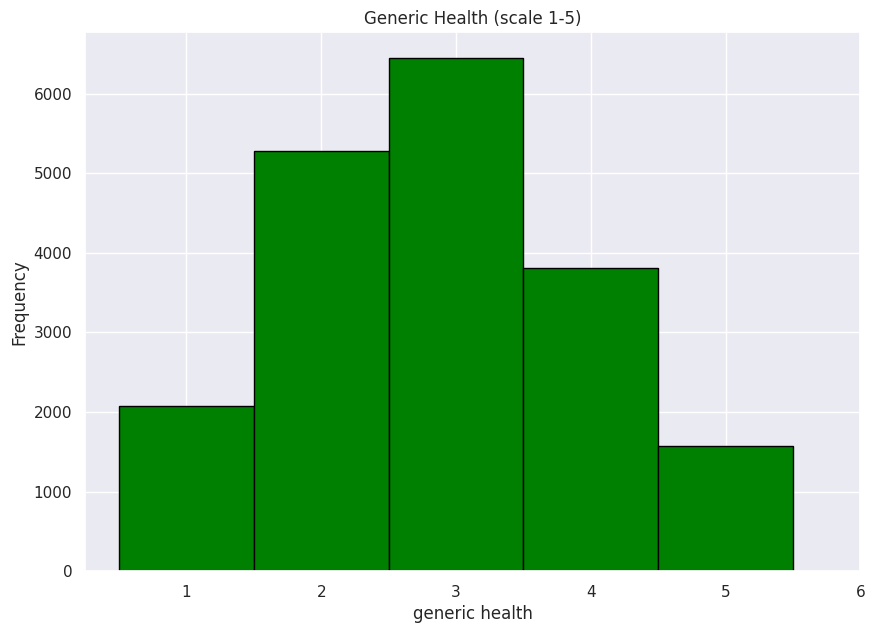

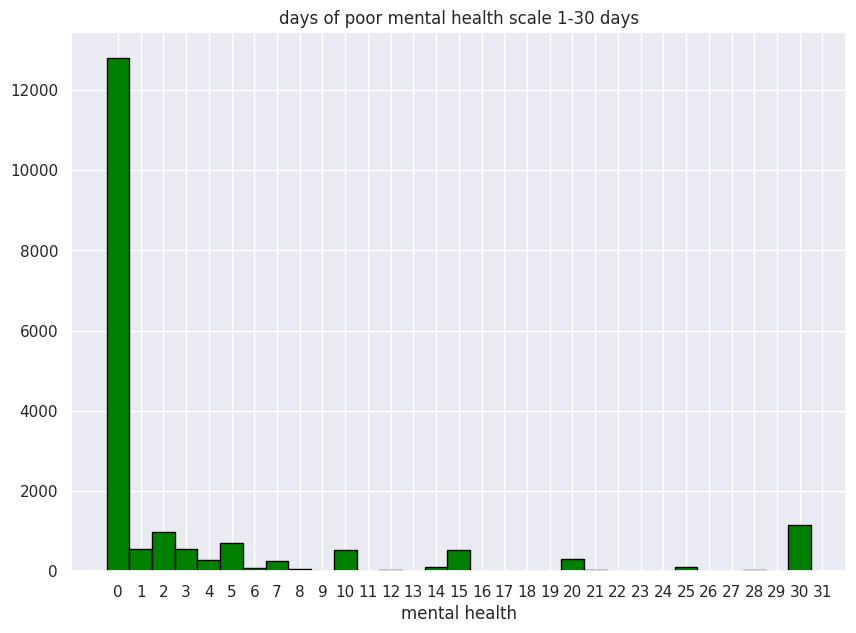

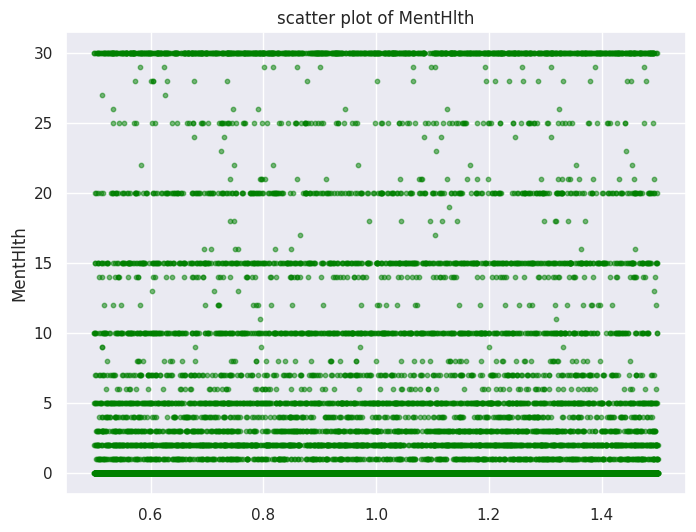

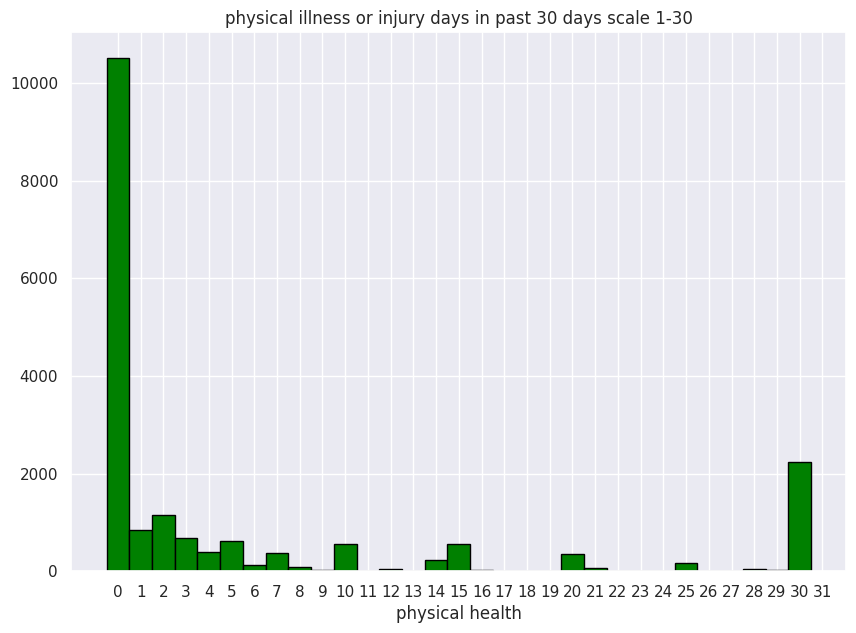

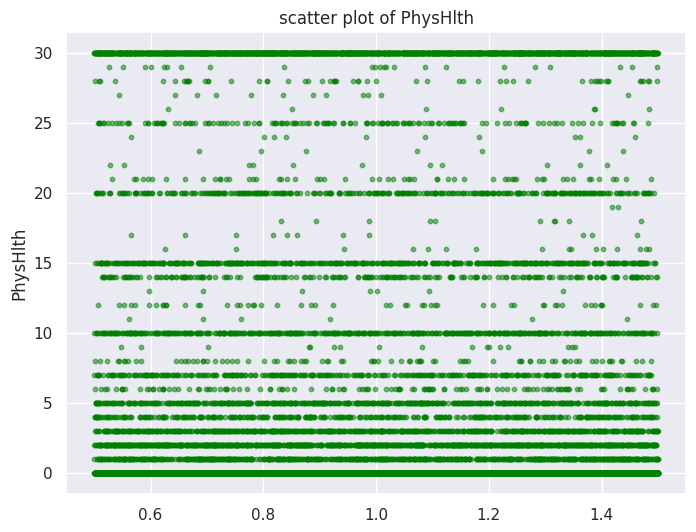

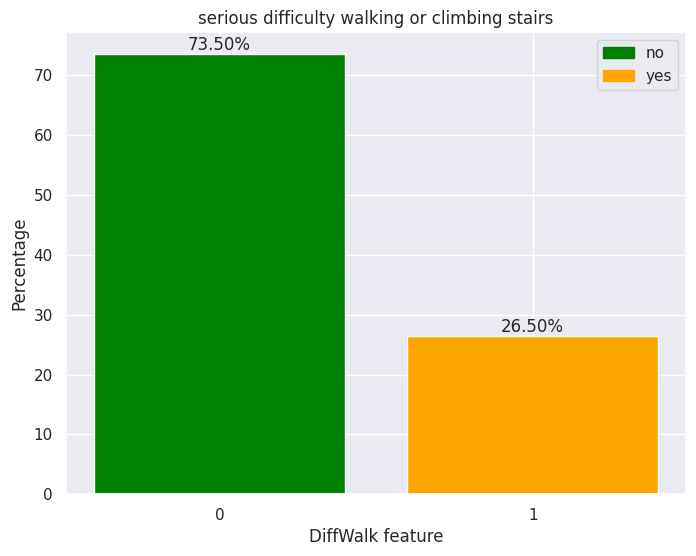

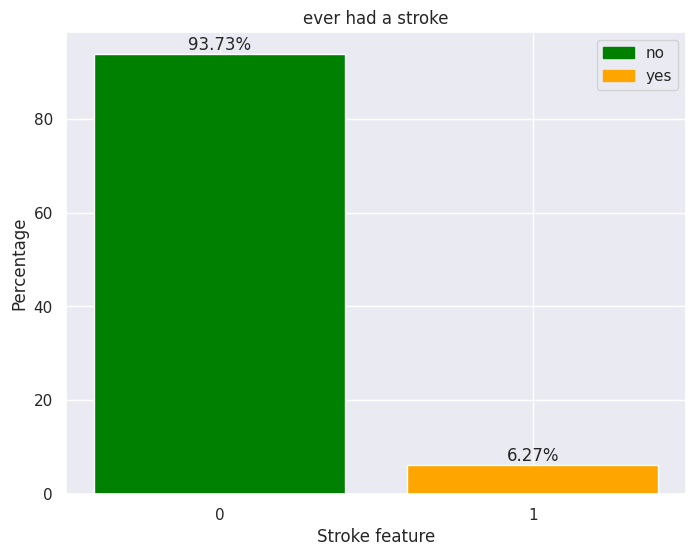

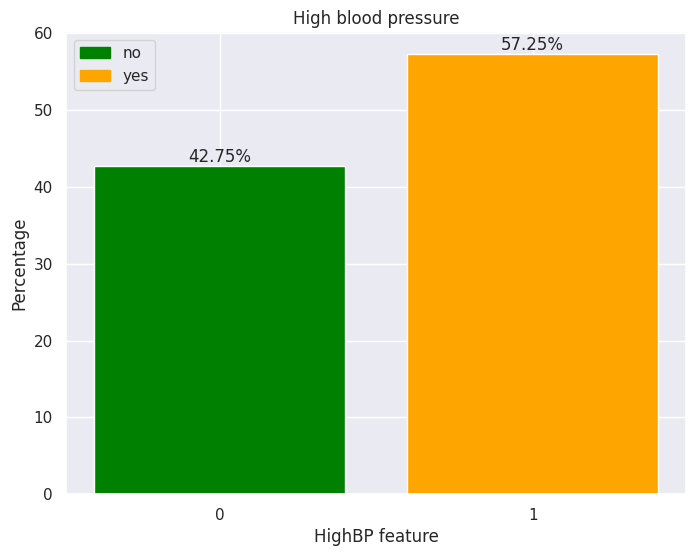

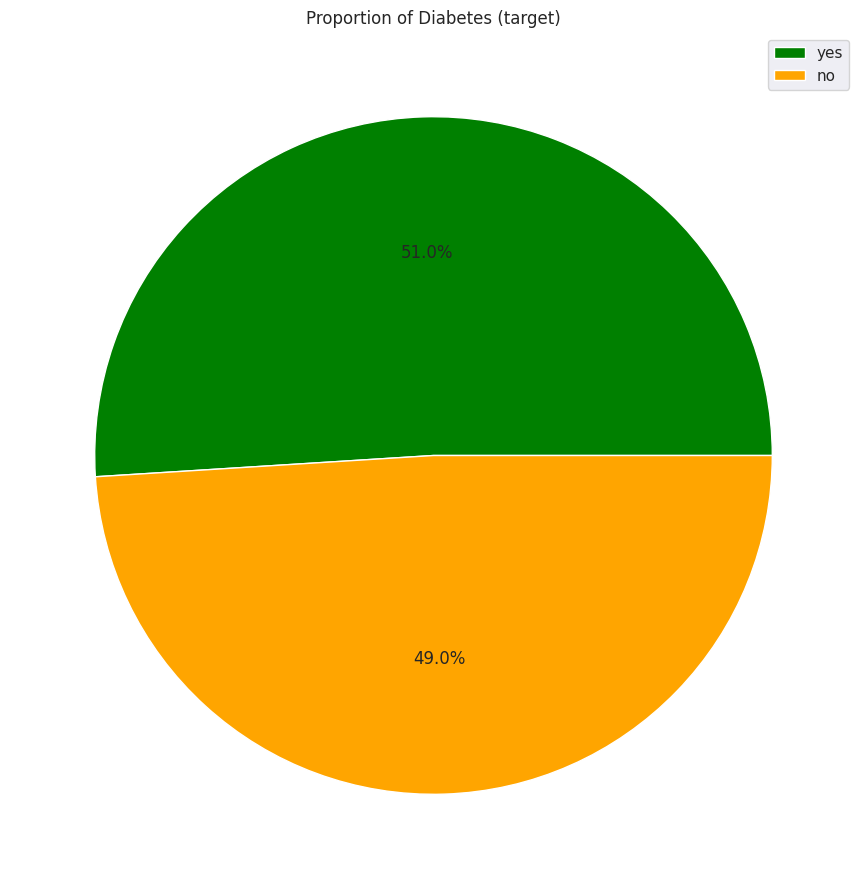

1154


In [ ]:
from matplotlib.ticker import MultipleLocator

def printPlots():
    total_rows = len(sampled_df)
    for column in sampled_df.columns:
        if column == 'Age':
            fig, ax = plt.subplots(figsize=(10, 7))
            bins = np.arange(sampled_df[column].min(), sampled_df[column].max() + 2)
            hist, bins, _ = ax.hist(sampled_df[column], bins=bins, edgecolor='black', align='left', color='green')
            ax.set_xlabel('Age')
            ax.set_ylabel('Frequency')
            ax.set_title(f'Bar Plot of {column}')
            ax.set_xticks(bins)
            plt.show()
        elif column == 'BMI':
            fig, ax = plt.subplots(figsize=(10, 6))
            ax.boxplot(df[column])
            ax.set_xlabel('BMI')
            ax.set_ylabel('Values')
            ax.set_title(f'Boxplot of {column}')
            ax.yaxis.set_major_locator(MultipleLocator(10))
            plt.show()
            printScatterPlot('BMI')
        elif column in ['GenHlth', 'MentHlth', 'PhysHlth']:
            fig, ax = plt.subplots(figsize=(10, 7))
            if column == 'GenHlth':
              ax.set_title(f'Generic Health (scale 1-5)')
              ax.set_xlabel('generic health')
              bins = np.arange(sampled_df[column].min(), sampled_df[column].max() + 2)
              hist, bins, _ = ax.hist(sampled_df[column], bins=bins, edgecolor='black', align='left', color='green')
              ax.set_xticks(bins)
            elif column == 'PhysHlth':
              ax.set_title(f'physical illness or injury days in past 30 days scale 1-30')
              ax.set_xlabel('physical health')
              bins = np.arange(sampled_df[column].min(), sampled_df[column].max() + 2)
              hist, bins, _ = ax.hist(sampled_df[column], bins=bins, edgecolor='black', align='left', color='green')
              ax.set_xticks(bins)
              printScatterPlot('PhysHlth')
            elif column == 'MentHlth':
              ax.set_title(f'days of poor mental health scale 1-30 days')
              ax.set_xlabel('mental health')
              bins = np.arange(sampled_df[column].min(), sampled_df[column].max() + 2)
              hist, bins, _ = ax.hist(sampled_df[column], bins=bins, edgecolor='black', align='left', color='green')
              ax.set_xticks(bins)
              printScatterPlot('MentHlth')

            ax.set_ylabel('Frequency')
            plt.show()

        elif column == 'Diabetes':
            counts = sampled_df[column].value_counts()
            percentages = [count / total_rows * 100 for count in counts]
            plt.pie(percentages, autopct='%1.1f%%', colors=['green', 'orange'])
            plt.title(f'Proportion of {column} (target)')
            labels = ['yes', 'no']
            plt.legend(labels=labels, loc='upper right')
            plt.show()
        else:
            fig, ax = plt.subplots(figsize=(8, 6))
            column_counts = sampled_df[column].value_counts()
            percentages = [count / total_rows * 100 for count in column_counts]
            ax.set_xlabel(f'{column} feature')
            ax.set_ylabel('Percentage')
            legend_labels = ['no', 'yes']
            if column == 'Gender':
                ax.set_title(f'Gender')
                legend_labels = ['Female', 'Male']
            elif column == 'HighChol':
                ax.set_title(f'High cholesterol values')
            elif column == 'CholCheck':
                ax.set_title(f'Cholesterol check in the past 5 years')
                percentages.reverse()
                legend_labels = ['no', 'yes']
            elif column == 'Smoker':
                ax.set_title(f'smoked more than 100 cigarettes in entire life')
            elif column == 'HeartDiseaseorAttack':
                ax.set_title(f'coronary heart disease (CHD) or myocardial infarction (MI)')
            elif column == 'PhysActivity':
                ax.set_title(f'physical activity in past 30 days')
                percentages.reverse()
                legend_labels = ['no', 'yes']
            elif column == 'Fruits':
                ax.set_title(f'Consume Fruit 1 or more times per day')
                percentages.reverse()
                legend_labels = ['no', 'yes']
            elif column == 'Veggies':
                ax.set_title(f'Consume Vegetables 1 or more times per day')
                percentages.reverse()
                legend_labels = ['no', 'yes']
            elif column == 'HvyAlcoholConsump':
                ax.set_title(f'Heavy alcohol consume')
            elif column == 'DiffWalk':
                ax.set_title(f'serious difficulty walking or climbing stairs')
            elif column == 'Stroke':
                ax.set_title(f'ever had a stroke')
            elif column == 'HighBP':
                ax.set_title(f'High blood pressure')
                percentages.reverse()
                legend_labels = ['no', 'yes']

            bars = ax.bar(['0', '1'], percentages, color=['green', 'orange'])
            for bar in bars:
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}%', ha='center', va='bottom')
            if 'legend_labels' in locals():
                ax.legend(handles=[plt.Rectangle((0,0),1,1, color='green'),
                                   plt.Rectangle((0,0),1,1, color='orange')],
                          labels=legend_labels)
            plt.show()

def printScatterPlot(label):
    x_values = np.random.uniform(0.5, 1.5, size=len(sampled_df[label]))
    plt.figure(figsize=(8, 6), facecolor='white')
    plt.scatter(x_values, sampled_df[label], s=10, color='green', alpha=0.5)
    plt.title(f'scatter plot of {label}')
    plt.ylabel(label)
    plt.show()

printPlots()

# Analisi Statistica Multivariata


 Frequenza Diabete per features categoriche

<ipython-input-431-bc85ec2577f7>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['1', '2', '3', '4', '5'])


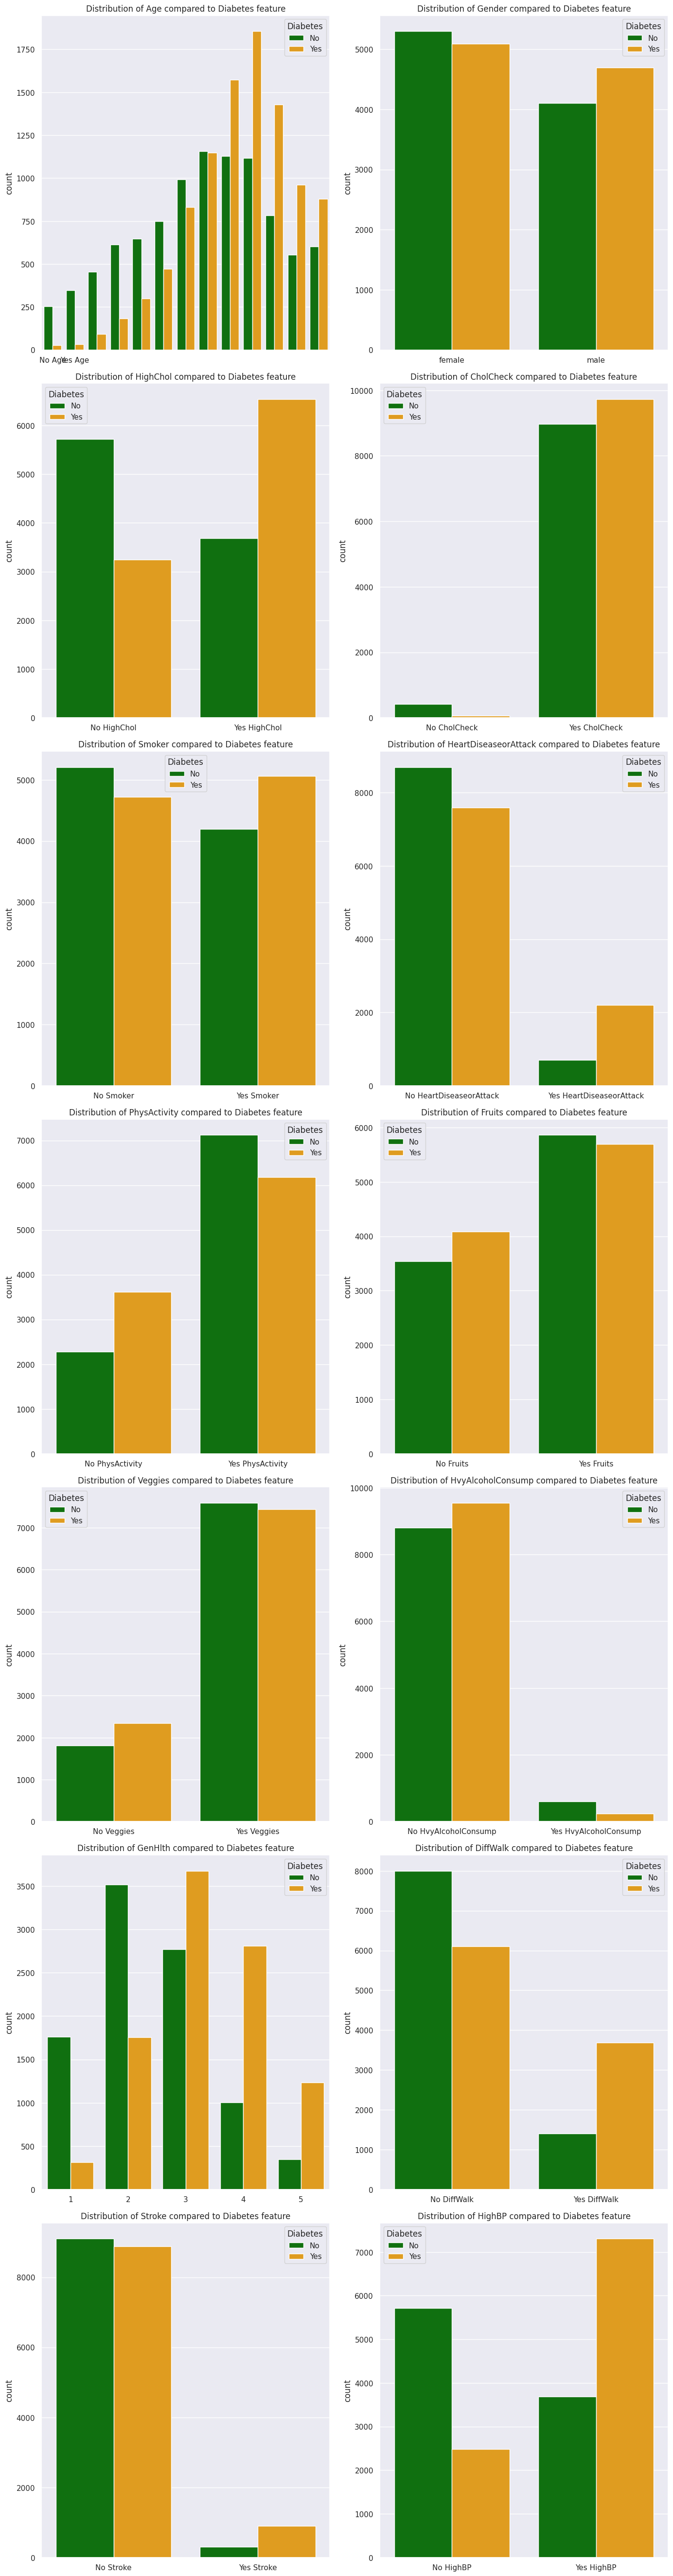

Gender == 1 diabetes rate of 53.36287207452851
HighChol == 1 diabetes rate of 63.95110024449878
CholCheck == 1 diabetes rate of 52.0156116338751
Smoker == 1 diabetes rate of 54.6927313964791
HeartDiseaseorAttack == 1 diabetes rate of 75.72214580467676
PhysActivity == 1 diabetes rate of 46.44307414648819
Fruits == 1 diabetes rate of 49.28651733979071
Veggies == 1 diabetes rate of 49.50422572702469
HvyAlcoholConsump == 1 diabetes rate of 28.504122497055363
DiffWalk == 1 diabetes rate of 72.41447109712938
Stroke == 1 diabetes rate of 74.83388704318938
HighBP == 1 diabetes rate of 66.47856557750067


Gender == 0 diabetes rate of 48.99884482094725
HighChol == 0 diabetes rate of 36.2297824874512
CholCheck == 0 diabetes rate of 11.934156378600823
Smoker == 0 diabetes rate of 47.5581512435807
HeartDiseaseorAttack == 0 diabetes rate of 46.58518609507431
PhysActivity == 0 diabetes rate of 61.28649015614393
Fruits == 0 diabetes rate of 53.599055985315324
Veggies == 0 diabetes rate of 56.401633437

In [ ]:
from matplotlib.ticker import MaxNLocator

features = [x for x in sampled_df.columns if x not in ['BMI', 'PhysHlth', 'Diabetes', 'MentHlth']]

def plot_distribution_by_diabetes(sampled_df, columns):
    plt.figure(figsize=(14, len(columns)*4))
    for i, column in enumerate(features):
        plt.subplot(len(columns) // 2 + 1, 2, i + 1)
        palette = ['green','orange']
        unique_values = sampled_df[column].unique()
        ax = sns.countplot(x=column, hue="Diabetes", data=sampled_df, palette=palette)
        plt.title(f'Distribution of {column} compared to Diabetes feature')
        plt.xlabel('')

        if column == 'GenHlth':
            # Set x-label ticks for GenHlth to the values from 1 to 5
            ax.set_xticklabels(['1', '2', '3', '4', '5'])
        else:
          if column == 'Gender':
              plt.xticks([0, 1], [f'female', f'male'])
          else:
            plt.xticks([0, 1], [f'No {column}', f'Yes {column}'])

        # Change legend labels for Diabetes feature
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles=handles, labels=['No', 'Yes'], title='Diabetes')

    plt.tight_layout()

columns = sampled_df.columns.drop("Diabetes")  # Remove "Diabetes" from the list of columns
plot_distribution_by_diabetes(sampled_df, columns)
plt.show()

binaryFeatures = [x for x in sampled_df.columns if x not in ['BMI', 'PhysHlth', 'Diabetes', 'MentHlth','Age','GenHlth']]

for column in binaryFeatures:
  countDiabetes = len(sampled_df[(sampled_df[column] == 1) & (sampled_df['Diabetes'] == 1)])
  countNotDiabetes = len(sampled_df[(sampled_df[column] == 1) & (sampled_df['Diabetes'] == 0)])

  totalCounts = countDiabetes + countNotDiabetes
  result = countDiabetes/totalCounts*100

  print(f'{column} == 1 diabetes rate of {result}')

print('\n')
for column in binaryFeatures:
  countDiabetes = len(sampled_df[(sampled_df[column] == 0) & (sampled_df['Diabetes'] == 1)])
  countNotDiabetes = len(sampled_df[(sampled_df[column] == 0) & (sampled_df['Diabetes'] == 0)])

  totalCounts = countDiabetes + countNotDiabetes
  result = countDiabetes/totalCounts*100

  print(f'{column} == 0 diabetes rate of {result}')


Frequenza Diabete per features non categoriche

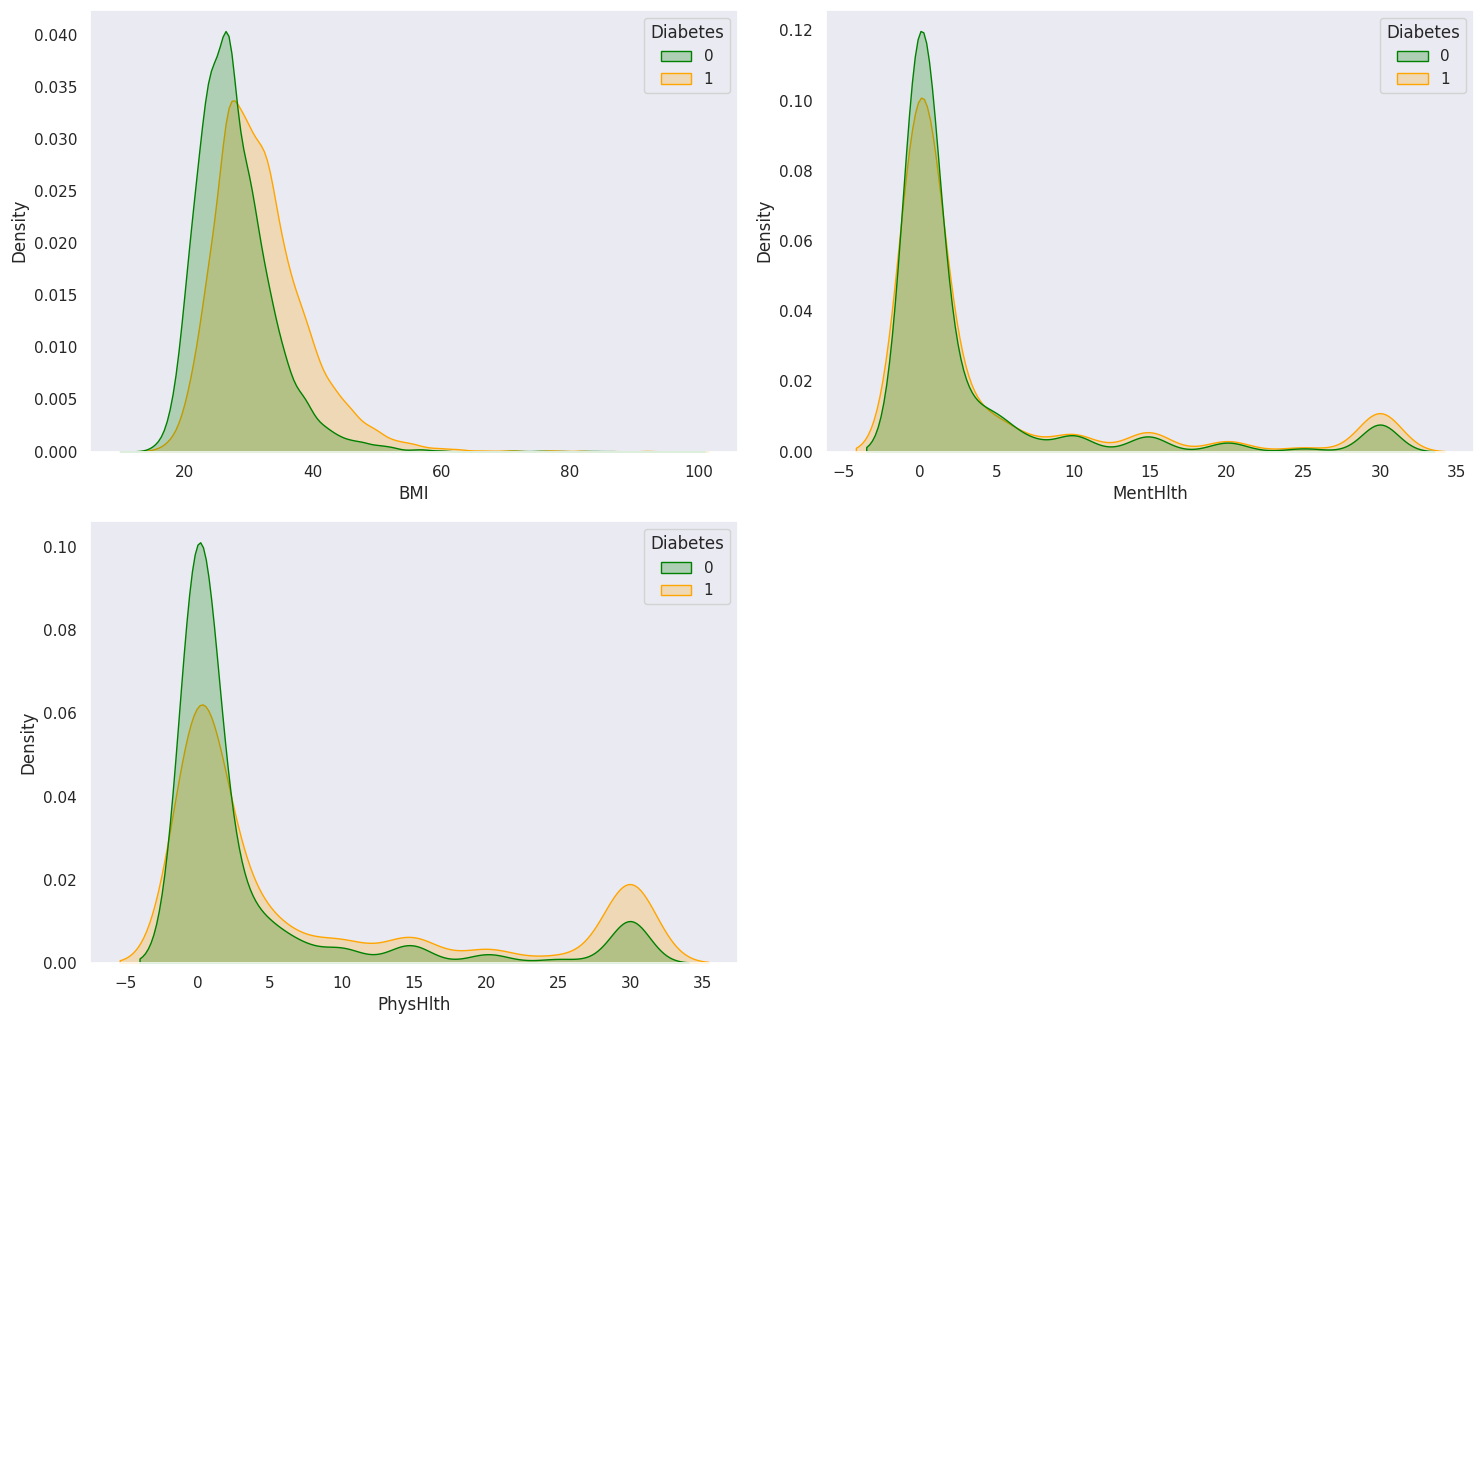

In [ ]:
import seaborn as sb

features = ['BMI', 'MentHlth', 'PhysHlth']

def plot_distribution_by_diabetes(data, features):
    fig, ax = plt.subplots(3, 2, figsize=(15, 15))
    k = 0
    palette = ['green', 'orange']
    for i in range(3):
        for j in range(2):
            if k < len(features):
                col = features[k]
                if col in ['BMI', 'MentHlth', 'PhysHlth']:
                    sb.kdeplot(data=data, x=col, hue='Diabetes', ax=ax[i, j], palette=palette, legend=True, fill=True)
                else:
                    sb.countplot(data=data, x=col, hue='Diabetes', ax=ax[i, j], palette=palette, legend=True, fill=True)
                ax[i, j].grid(False)
            else:
                ax[i, j].axis('off')
            k += 1
    plt.tight_layout()
    plt.show()

plot_distribution_by_diabetes(sampled_df, features)


Correlazione tra ogni feature e il target Diabete

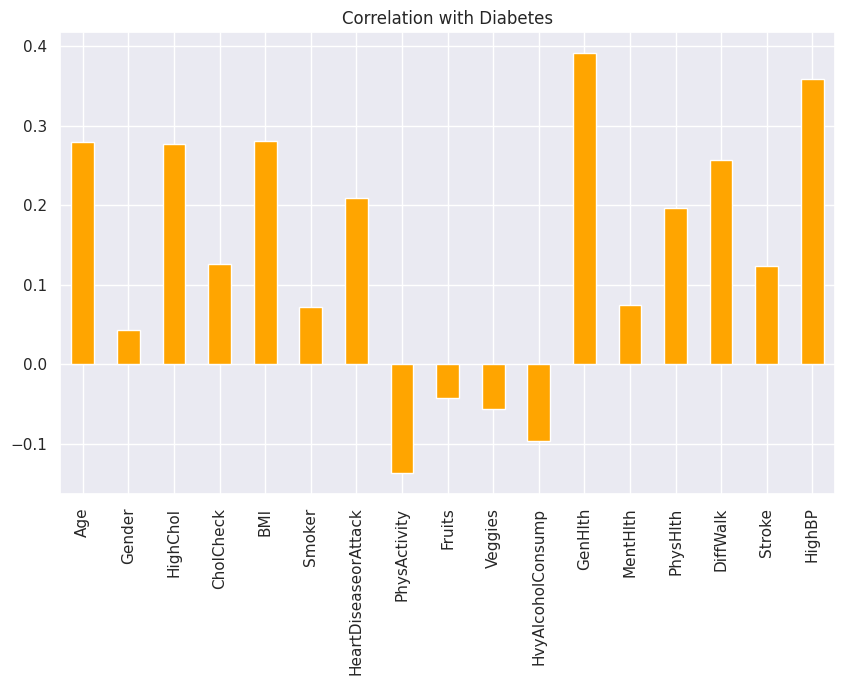

In [ ]:
sampled_df.drop('Diabetes', axis=1).corrwith(df.Diabetes).plot(kind='bar', grid=True, figsize=(10, 6), title="Correlation with Diabetes",color="orange");

Correlazione tra qualsiasi features

<Axes: >

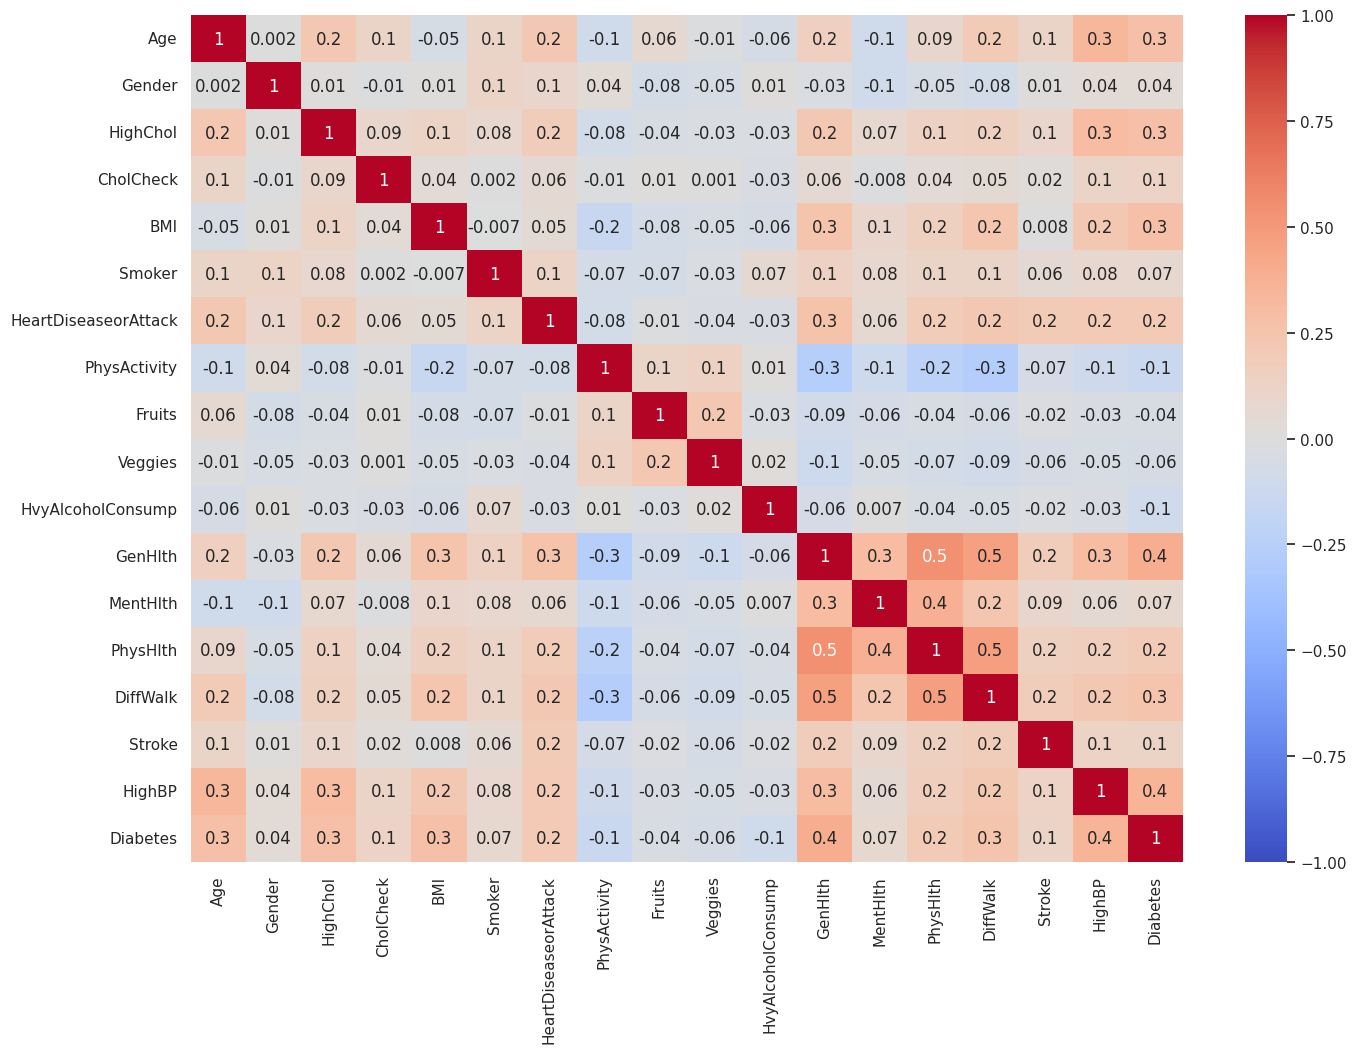

In [ ]:
sns.set(rc = {'figure.figsize':(16,11)})
sns.heatmap(sampled_df.corr(),vmin=-1, vmax=1, annot = True, fmt='.1g',cmap= 'coolwarm')

# Eliminazione degli outlier e selezione delle features

Eliminazione dei valori di BMI superiori a 60. Come dimostrato in precedenza, per valori superiori a 60 c'è una perdita di contenuto informativo utile per la predizione del diabete

In [ ]:
sampled_df = sampled_df.drop(sampled_df[sampled_df['BMI'] > 60].index)

Eliminazione valori di mental health con count rate inferiore a 80

In [ ]:
df_count = sampled_df['MentHlth'].value_counts()

values_to_drop = df_count[df_count < 80].index

sampled_df = sampled_df.drop(sampled_df[sampled_df['MentHlth'].isin(values_to_drop)].index)

Eliminazione dei valori di physic health con count rate inferiore a 80

In [ ]:
sampled_df_count = sampled_df['PhysHlth'].value_counts()

values_to_drop = sampled_df_count[sampled_df_count < 80].index

sampled_df = sampled_df.drop(sampled_df[sampled_df['PhysHlth'].isin(values_to_drop)].index)

Come mostrato negli ultimi grafici relativi alla correlazione tra features e target, è stato deciso di eliminare le features con meno contenuto informativo e una correlazione tra target inferiore/maggiore di +-0.1

In [ ]:
sampled_df.drop(columns=['Gender'], inplace=True)
sampled_df.drop(columns=['Smoker'], inplace=True)
sampled_df.drop(columns=['Fruits'], inplace=True)
sampled_df.drop(columns=['Veggies'], inplace=True)
sampled_df.drop(columns=['MentHlth'], inplace=True)
sampled_df.drop(columns=['HvyAlcoholConsump'], inplace=True)

# Albero Decisionale

Questo segmento di codice illustra il passo essenziale di suddivisione di un dataset in set di addestramento e di test, una pratica fondamentale nell'apprendimento automatico. Viene applicato un rapporto di divisione del 70-30, con il 70% dei dati utilizzato per addestrare il modello e il 30% riservato per valutarne le prestazioni. Il parametro random_state è impostato su 42 per garantire la riproducibilità della divisione.


In [ ]:
#Suddivdiamo il dataset in training set e test set (con test size del 30%)
from sklearn.model_selection import train_test_split
X = sampled_df.drop('Diabetes', axis=1)
y = sampled_df['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Questo codice utilizza un classificatore basato su albero decisionale per addestrare un modello per la predizione della presenza diabete.Le performance del modello vengono stampate attraverso i report di classificazione sia per il set di addestramento che per quello di test.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Creazione del classificatore dell'albero decisionale
model_dt = DecisionTreeClassifier(random_state=42)

# Addestramento del modello sul set di addestramento
model_dt.fit(X_train, y_train)

# Predizione sul set di addestramento e test
pred_train = model_dt.predict(X_train)
pred_test = model_dt.predict(X_test)

# Valutazione delle prestazioni sul set di addestramento
print("Prestazioni sul Set di Addestramento:")
print(classification_report(y_train, pred_train))

# Valutazione delle prestazioni sul set di test
print("\nPrestazioni sul Set di Test:")
print(classification_report(y_test, pred_test))


Prestazioni sul Set di Addestramento:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      6413
           1       0.97      0.90      0.94      6577

    accuracy                           0.94     12990
   macro avg       0.94      0.94      0.94     12990
weighted avg       0.94      0.94      0.94     12990


Prestazioni sul Set di Test:
              precision    recall  f1-score   support

           0       0.64      0.68      0.66      2736
           1       0.67      0.63      0.65      2832

    accuracy                           0.65      5568
   macro avg       0.66      0.66      0.65      5568
weighted avg       0.66      0.65      0.65      5568



Questo codice calcola e visualizza la curva ROC, oltre a calcolare l'AUC (Area Under the Curve) per un modello di classificazione binaria. La curva ROC e l'AUC valutano la capacità del modello di distinguere tra le classi positive e negative, fornendo un riassunto conciso delle sue prestazioni.

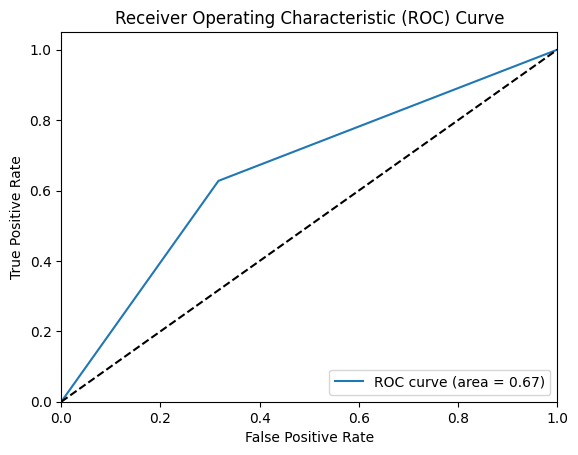

AUC Score: 0.6651632501982357


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
# Calcolo delle probabilità predette per la classe positiva
y_pred_prob = model_dt.predict_proba(X_test)[:, 1]

# Calcolo delle metriche della curva ROC
fpr, tpr, thresholds = roc_curve(y_test, pred_test)

# Calcolo dell'Area Under the Curve (AUC) della curva ROC
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot della curva ROC utilizzando Matplotlib
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Visualizzazione dell'AUC Score
print("AUC Score:", roc_auc)


La visualizzazione della matrice di confusione offre una rappresentazione chiara e sintetica delle prestazioni di un modello di classificazione.

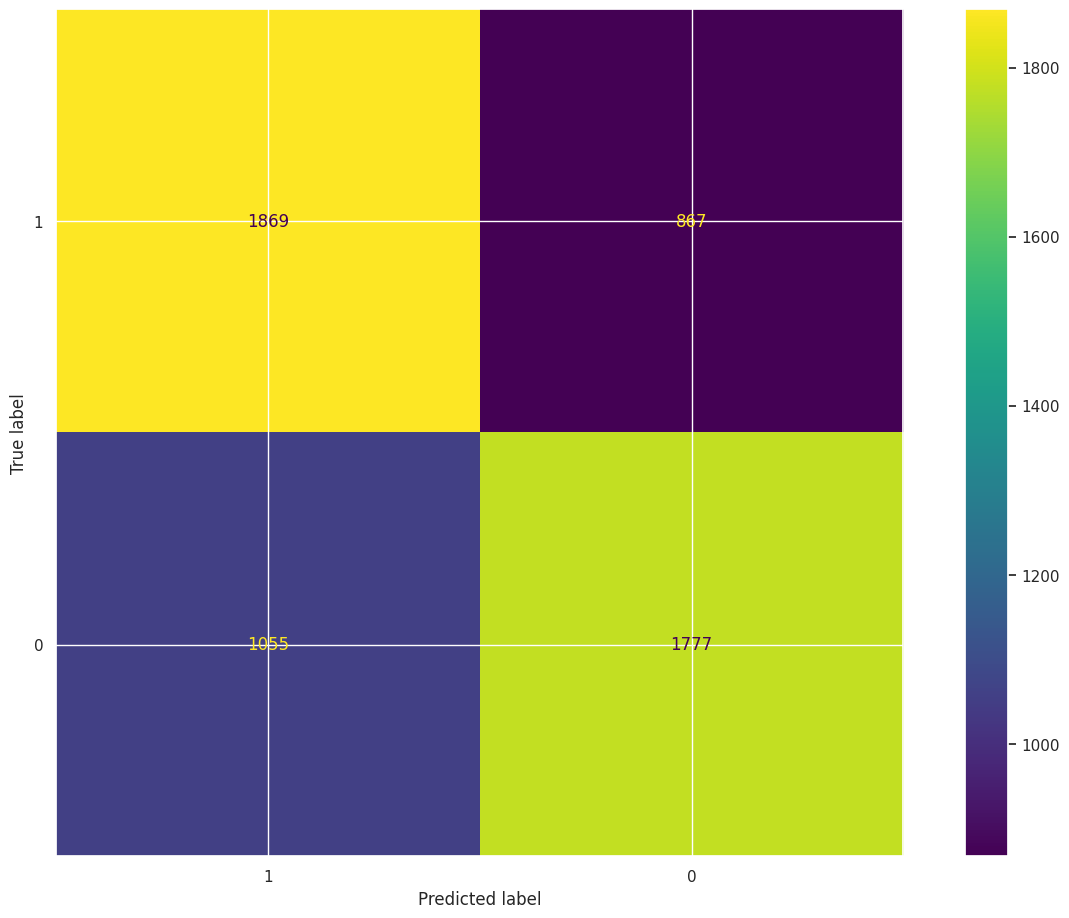

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test,pred_test)
labels = [1,0]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

Nonostante i risultati complessivi siano positivi, è evidente una disparità significativa tra le prestazioni nel training set, che sono estremamente confortanti, e quelle nel test set. Tale discrepanza suggerisce la presenza di overfitting nel modello, indicando una sovraadattamento eccessivo ai dati di addestramento. Al fine di affrontare questa problematica, si opta per l'utilizzo di RandomSearch, una procedura che consente di individuare gli iperparametri ottimali. L'obiettivo è massimizzare il valore dell'Area Under the Receiver Operating Characteristic curve (AUC) e, allo stesso tempo, mitigare l'overfitting, cercando una configurazione degli iperparametri che consenta una migliore generalizzazione del modello a nuovi dati.

RandomizedSearch


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from time import time
import numpy as np

# Creazione del classificatore dell'albero decisionale
tree_classifier = DecisionTreeClassifier(random_state=42)

# Definizione della griglia degli iperparametri
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': np.arange(2, 51, 2),
    'min_samples_leaf': np.arange(1, 9),
    'max_depth': [None, 5, 10, 15, 20]
}

# Utilizzo di RandomizedSearchCV per una ricerca efficiente degli iperparametri
random_search = RandomizedSearchCV(tree_classifier, param_distributions=param_dist, n_iter=100, cv=10, scoring='roc_auc', random_state=42)

# Misurazione del tempo di inizio per la ricerca degli iperparametri
start_time_hyperparameter_search = time()
random_search.fit(X_train, y_train)
end_time_hyperparameter_search = time()
hyperparameter_search_time = end_time_hyperparameter_search - start_time_hyperparameter_search

# Ottenimento dei migliori parametri e del miglior stimatore
best_params = random_search.best_params_
best_tree_classifier = random_search.best_estimator_

# Stampa dei migliori parametri e del loro ROC AUC score sul set di addestramento
y_train_pred_prob = best_tree_classifier.predict_proba(X_train)[:, 1]
roc_auc_train = roc_auc_score(y_train, y_train_pred_prob)

# Addestramento del modello sull'intero set di addestramento e misurazione del tempo di addestramento
start_time_training = time()
best_tree_classifier.fit(X_train, y_train)
end_time_training = time()
dt_training_time = end_time_training - start_time_training

# Previsioni sui set di addestramento e test
y_train_pred = best_tree_classifier.predict(X_train)
y_test_pred = best_tree_classifier.predict(X_test)

# Stampa delle prestazioni sul set di addestramento
print("\nPrestazioni sul Set di Addestramento:")
print(classification_report(y_train, y_train_pred))

# Stampa delle prestazioni sul set di test
print("\nPrestazioni sul Set di Test:")
print(classification_report(y_test, y_test_pred))

# Stampa dei migliori parametri e del tempo impiegato per la ricerca degli iperparametri e l'addestramento
print("\nMigliori Parametri:", best_params)
print("Tempo impiegato per la Ricerca degli Iperparametri:", hyperparameter_search_time, "secondi")
print("Tempo impiegato per l'Addestramento:", dt_training_time, "secondi")



Prestazioni sul Set di Addestramento:
              precision    recall  f1-score   support

           0       0.76      0.67      0.71      6413
           1       0.71      0.79      0.75      6577

    accuracy                           0.73     12990
   macro avg       0.73      0.73      0.73     12990
weighted avg       0.73      0.73      0.73     12990


Prestazioni sul Set di Test:
              precision    recall  f1-score   support

           0       0.74      0.66      0.70      2736
           1       0.70      0.78      0.74      2832

    accuracy                           0.72      5568
   macro avg       0.72      0.72      0.72      5568
weighted avg       0.72      0.72      0.72      5568


Migliori Parametri: {'min_samples_split': 14, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 5, 'criterion': 'entropy'}
Tempo impiegato per la Ricerca degli Iperparametri: 13.53285002708435 secondi
Tempo impiegato per l'Addestramento: 0.01240992546081543 secondi


Confusion Matrix , dopo la ricerca degli iperparametri

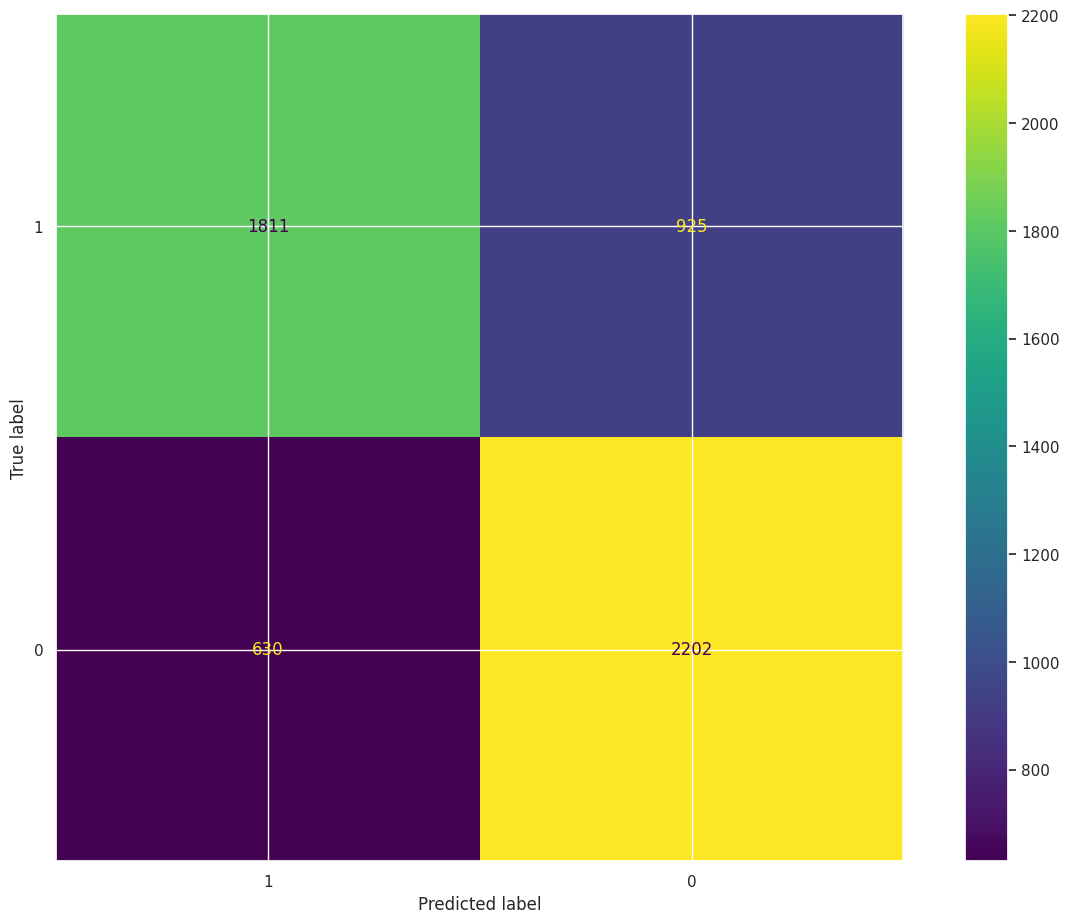

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_test_pred)
labels = [1,0]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

### Curva ROC per albero di decisione

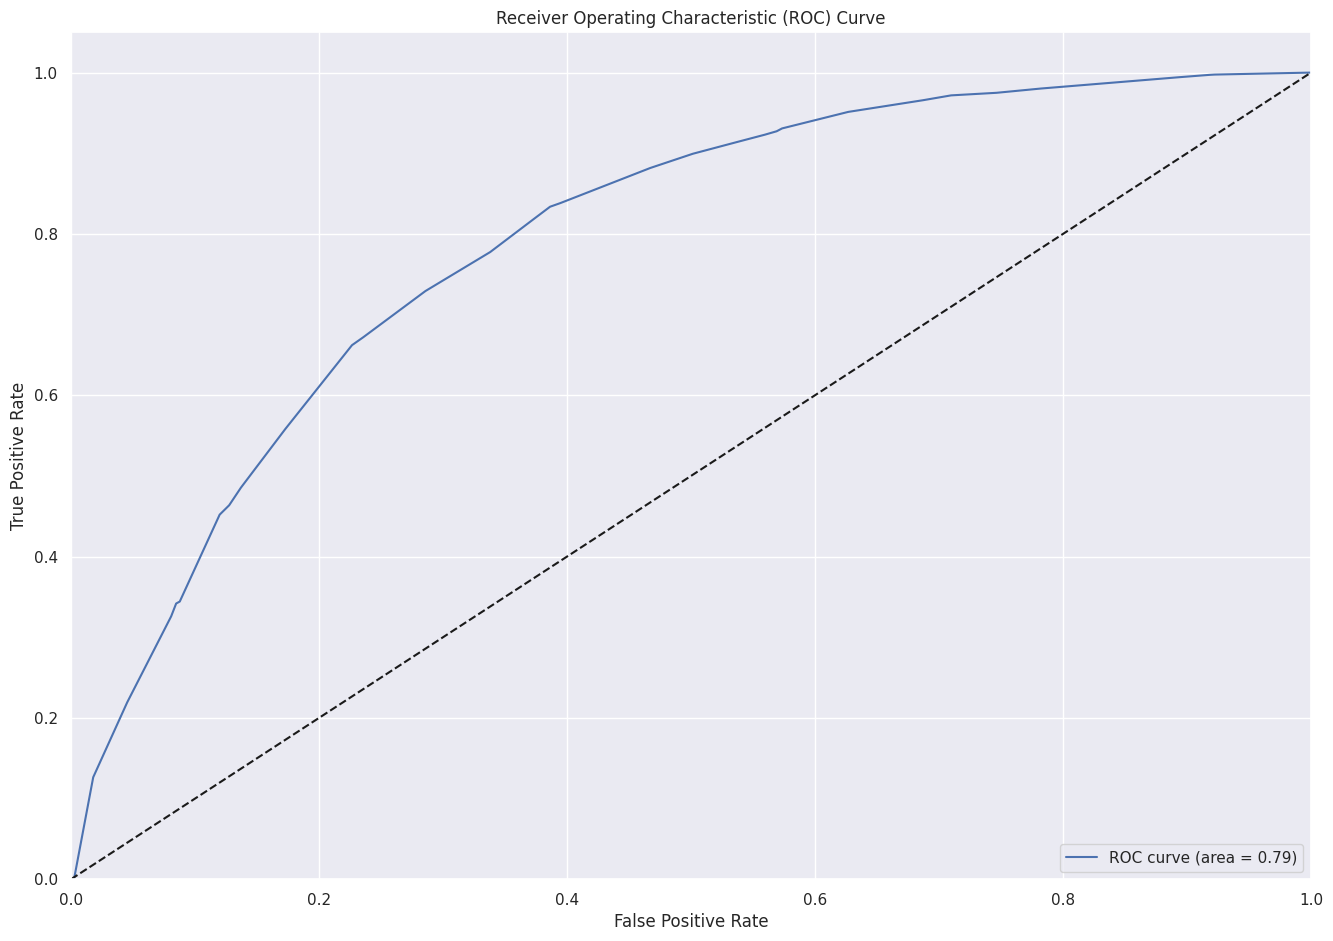

AUC Score: 0.7918985224212839


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_prob = random_search.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("AUC Score:", roc_auc)


Dopo l'implementazione della ricerca di iperparametri, si osserva un miglioramento significativo nelle prestazioni del modello. La strategia di Randomized Search ha portato a una configurazione ottimizzata degli iperparametri
Complessivamente, questo indicativo di un modello ottimizzato con migliori prestazioni rispetto alla configurazione iniziale.

### 10-Fold Cross Validation

Questo frammento di codice implementa la validazione incrociata con K-Fold, una strategia fondamentale per valutare le prestazioni del modello su dati diversi. La classe KFold viene utilizzata per suddividere il set di addestramento in 10 fold, consentendo iterazioni attraverso diverse combinazioni di dati di addestramento e di validazione.

L'utilizzo della validazione incrociata K-Fold è essenziale in quanto fornisce una stima robusta delle prestazioni del modello su diverse suddivisioni dei dati di addestramento, riducendo il rischio di valutazioni distorte dovute a particolari configurazioni casuali dei dati.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

n_fold = 10
folds = KFold(n_splits=n_fold, shuffle=True)

accuracy_k_fold_dt = []

for n_fold, (train_idx, valid_idx) in enumerate(folds.split(X_train, y_train)):
    X_train_fold, X_valid_fold = X_train.iloc[train_idx], X_train.iloc[valid_idx]
    y_train_fold, y_valid_fold = y_train.iloc[train_idx], y_train.iloc[valid_idx]

    random_search.fit(X_train_fold, y_train_fold)
    # Fai previsioni sul set di validazione e calcola l'accuratezza
    y_valid_pred = random_search.predict(X_valid_fold)
    accuracy_k_fold_dt.append(accuracy_score(y_valid_fold, y_valid_pred))

In [ ]:
accuracy_k_fold_dt

[0.7220939183987682,
 0.7151655119322555,
 0.7297921478060047,
 0.7220939183987682,
 0.7228637413394919,
 0.7197844495765974,
 0.737490377213241,
 0.7490377213240954,
 0.7274826789838337,
 0.7182448036951501]

In [ ]:
import numpy as np
import scipy.stats as st
confidence_interval_dt = st.t.interval(confidence=0.95, df=len(accuracy_k_fold_dt)-1, loc=np.mean(accuracy_k_fold_dt), scale=st.sem(accuracy_k_fold_dt))
confidence_interval_dt

(0.7191166379306725, 0.7336932158029686)

La validazione incrociata con K-Fold ha ulteriormente supportato queste osservazioni, con un intervallo di confidenza del 95%. Questo suggerisce una buona capacità di generalizzazione su diverse partizioni del dataset di addestramento.

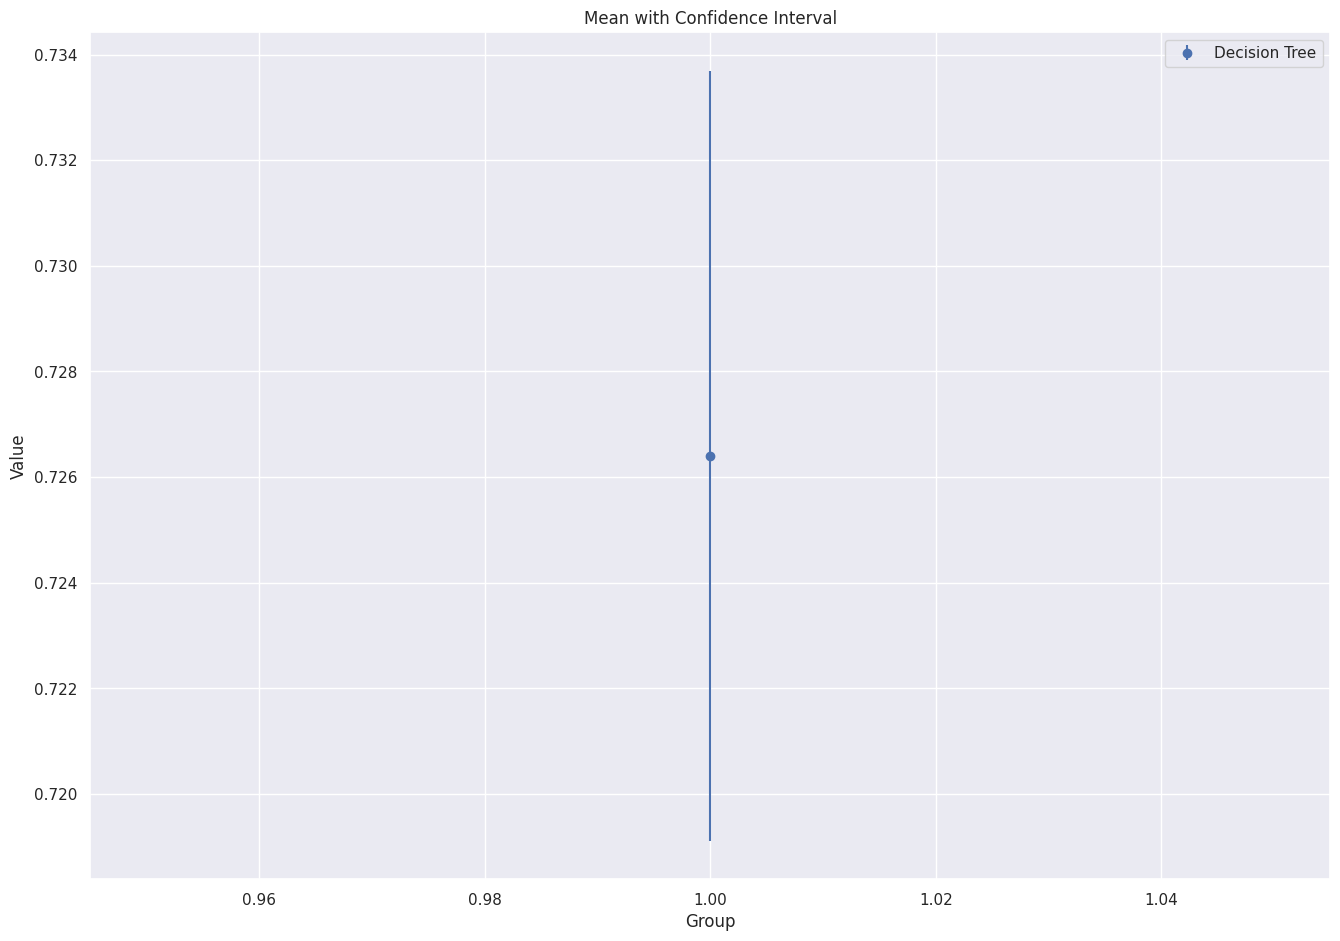

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# Calculate mean and confidence interval on k-fold
mean_accuracy_dt = np.mean(accuracy_k_fold_dt)
# Plot the mean and confidence interval
plt.errorbar(1, mean_accuracy_dt, yerr=(confidence_interval_dt[1] - confidence_interval_dt[0])/2, fmt='o', label='Decision Tree')
# Add labels and title
plt.xlabel('Group')
plt.ylabel('Value')
plt.title('Mean with Confidence Interval')
# Show the plot
plt.legend()
plt.show()







La visualizzazione dell'albero di decisione ottenuto dalla fase di addestramento con la ricerca di iperparametri fornisce una rappresentazione chiara e intuitiva delle decisioni che il modello prende per classificare le istanze. Ogni nodo dell'albero rappresenta una condizione su una feature, con le linee di decisione che si biforcano a seconda dell'esito della condizione.

AttributeError: 'Annotation' object has no attribute 'to_text'

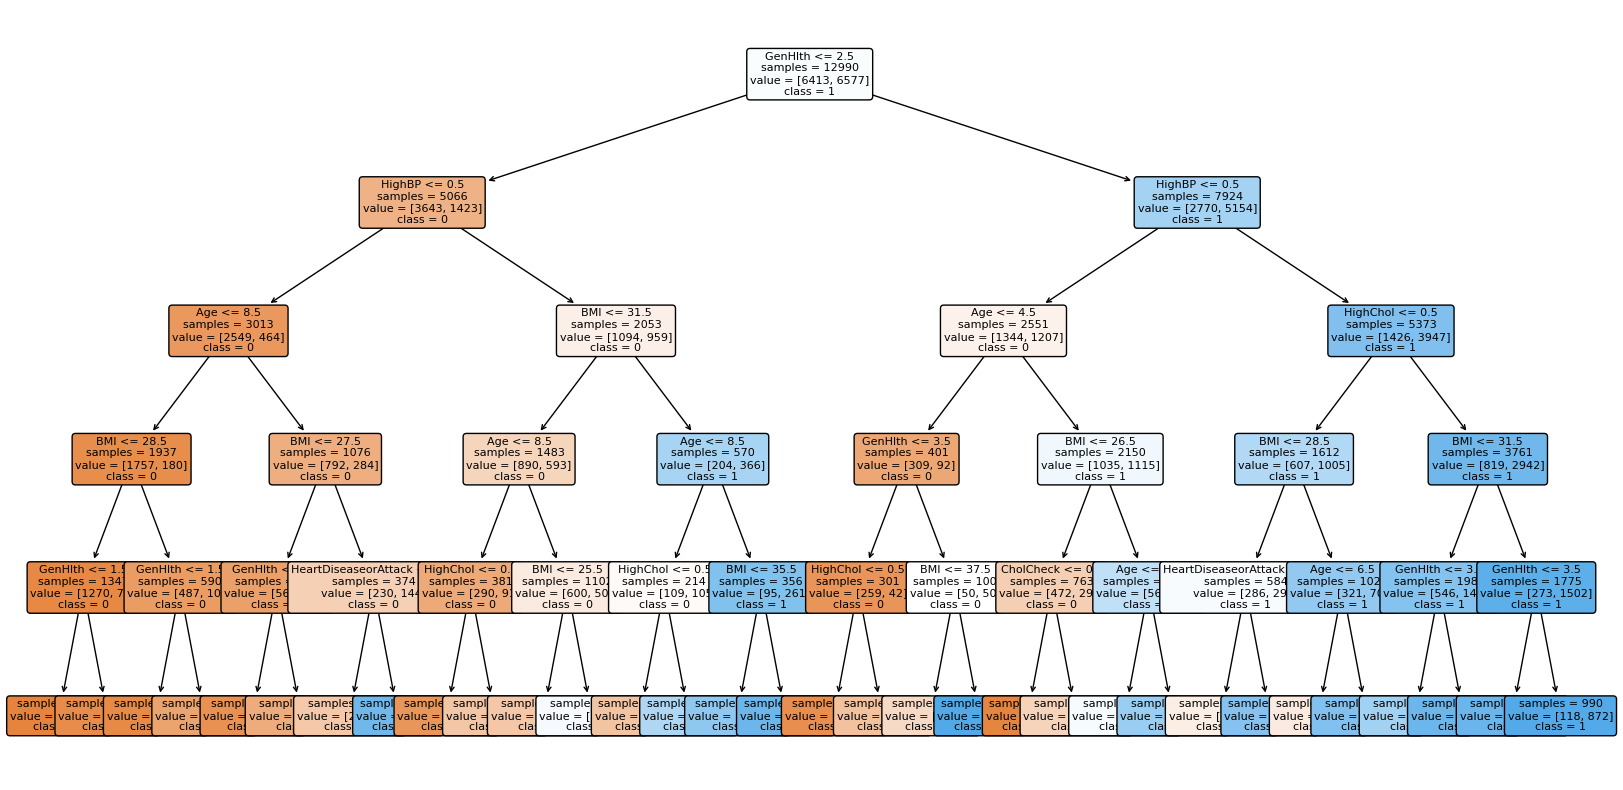

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Assuming random_search.best_estimator_ is your DecisionTreeClassifier and X_train is your training data

plt.figure(figsize=(20, 10))
tree_plot = plot_tree(random_search.best_estimator_, filled=True, feature_names=X_train.columns, class_names=['0', '1'], rounded=True, impurity=False, fontsize=8)

# Get the labels of each node and display them
text = tree_plot[0].to_text()
print("Node Labels:\n", text)

plt.show()


# Reti Neurali

In questa sezione viene presentato il modello inerente alle reti neurali

Come prima operazione si effettua la suddivisione del dataset in training set e test set. Viene applicato un rapporto di divisione del 70-30, con il 70% dei dati utilizzato per addestrare il modello e il 30% riservato per valutarne le prestazioni. Il parametro random_state è impostato su 42 per garantire la riproducibilità della divisione.

In [ ]:
# Estrazione delle features e variabile target
y = sampled_df['Diabetes']
X = sampled_df.drop(columns=['Diabetes'])

In [ ]:
# Suddivisione dataset in training set e test set (con dimensione del test_size del 30%)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In questo blocco di codice si definisce l'architettua della rete neurale. Il layer di input è composto da 11 neuroni, corrispondenti alle 11 features di input presenti nei dati. Il secondo layer ha 11 neuroni, mentre il layer di output possiede un solo neurone. Essendo in un problema di classificazione binaria, le funzioni di attivazioni scelte sono ReLU e sigmoid, mentre per la funzione di perdita (loss), si utilizza binary_crossentropy.

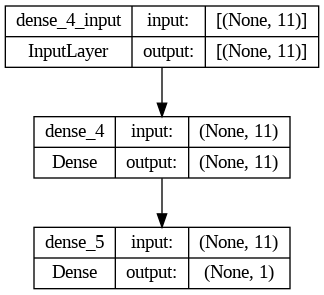

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Definiamo l'architettura della rete neurale:
# Layer di input con 11 neuroni (perché ci sono 11 features di input)
# Layer nascosto con 11 neuroni
# Layer di output con 1 neurone, poiché l'output è 0 o 1
model = Sequential()
model.add(Dense(11, input_shape=(11,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilazione del modello
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

keras.utils.plot_model(model, show_shapes=True)

Questa sezione di codice addestra la rete neurale con 40 epoche e un batch size di 10. Viene stampato il tempo totale di addestramento, valutato le prestazioni del modello sul set di test e si visualizzano i grafici loss e dell'accuratezza durante l'addestramento.

Epoch 1/40
1299/1299 [==============================] - 5s 4ms/step - loss: 0.7847 - accuracy: 0.6121 - val_loss: 0.6088 - val_accuracy: 0.6712
Epoch 2/40
1299/1299 [==============================] - 3s 2ms/step - loss: 0.5835 - accuracy: 0.6999 - val_loss: 0.5793 - val_accuracy: 0.7029
Epoch 3/40
1299/1299 [==============================] - 3s 2ms/step - loss: 0.5707 - accuracy: 0.7083 - val_loss: 0.5688 - val_accuracy: 0.7150
Epoch 4/40
1299/1299 [==============================] - 4s 3ms/step - loss: 0.5630 - accuracy: 0.7122 - val_loss: 0.5588 - val_accuracy: 0.7216
Epoch 5/40
1299/1299 [==============================] - 5s 4ms/step - loss: 0.5566 - accuracy: 0.7189 - val_loss: 0.5559 - val_accuracy: 0.7238
Epoch 6/40
1299/1299 [==============================] - 3s 3ms/step - loss: 0.5531 - accuracy: 0.7190 - val_loss: 0.5605 - val_accuracy: 0.7164
Epoch 7/40
1299/1299 [==============================] - 4s 3ms/step - loss: 0.5484 - accuracy: 0.7238 - val_loss: 0.5636 - val_accuracy:

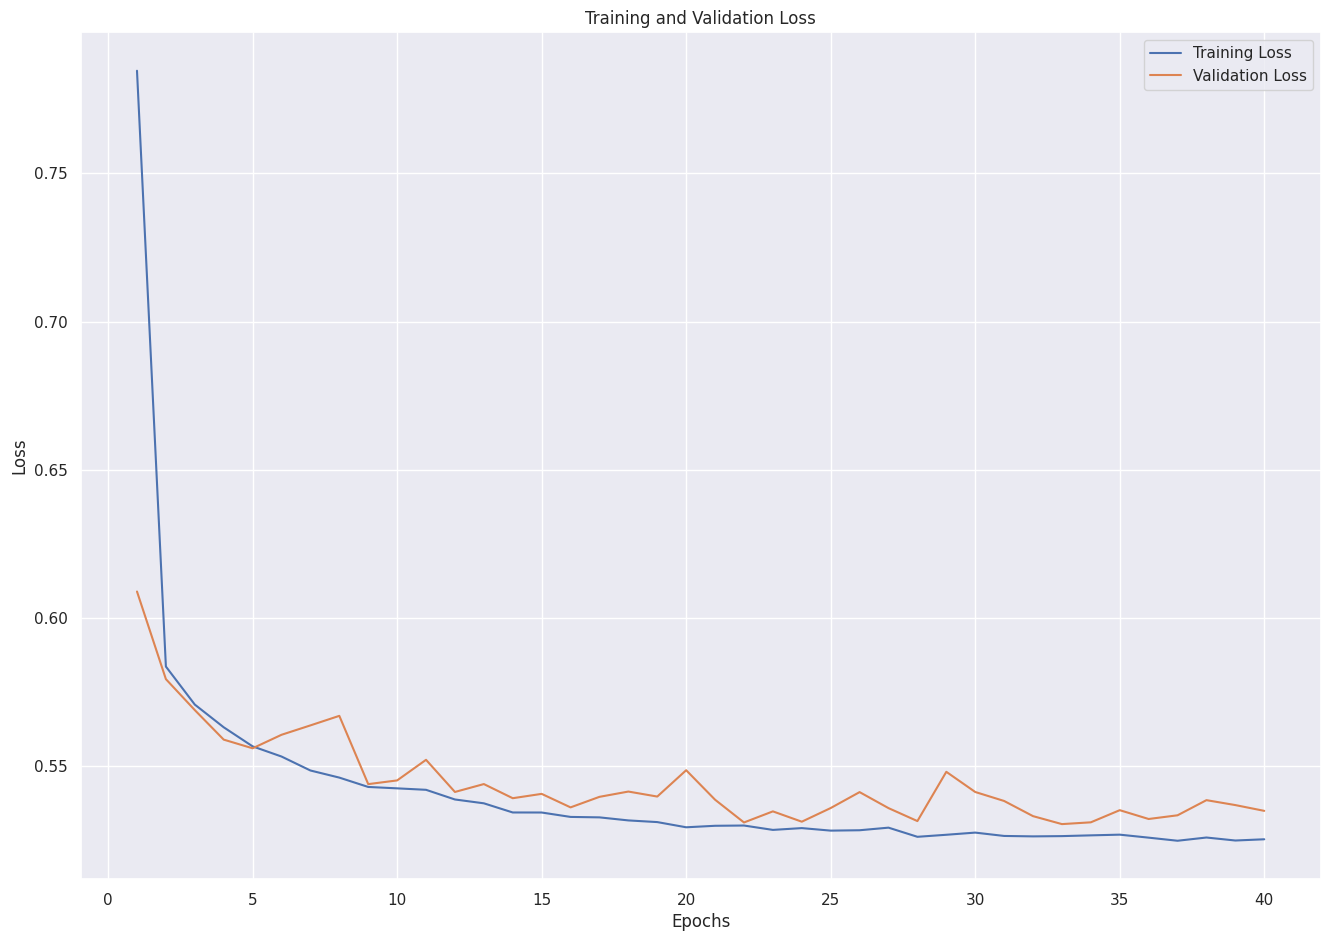

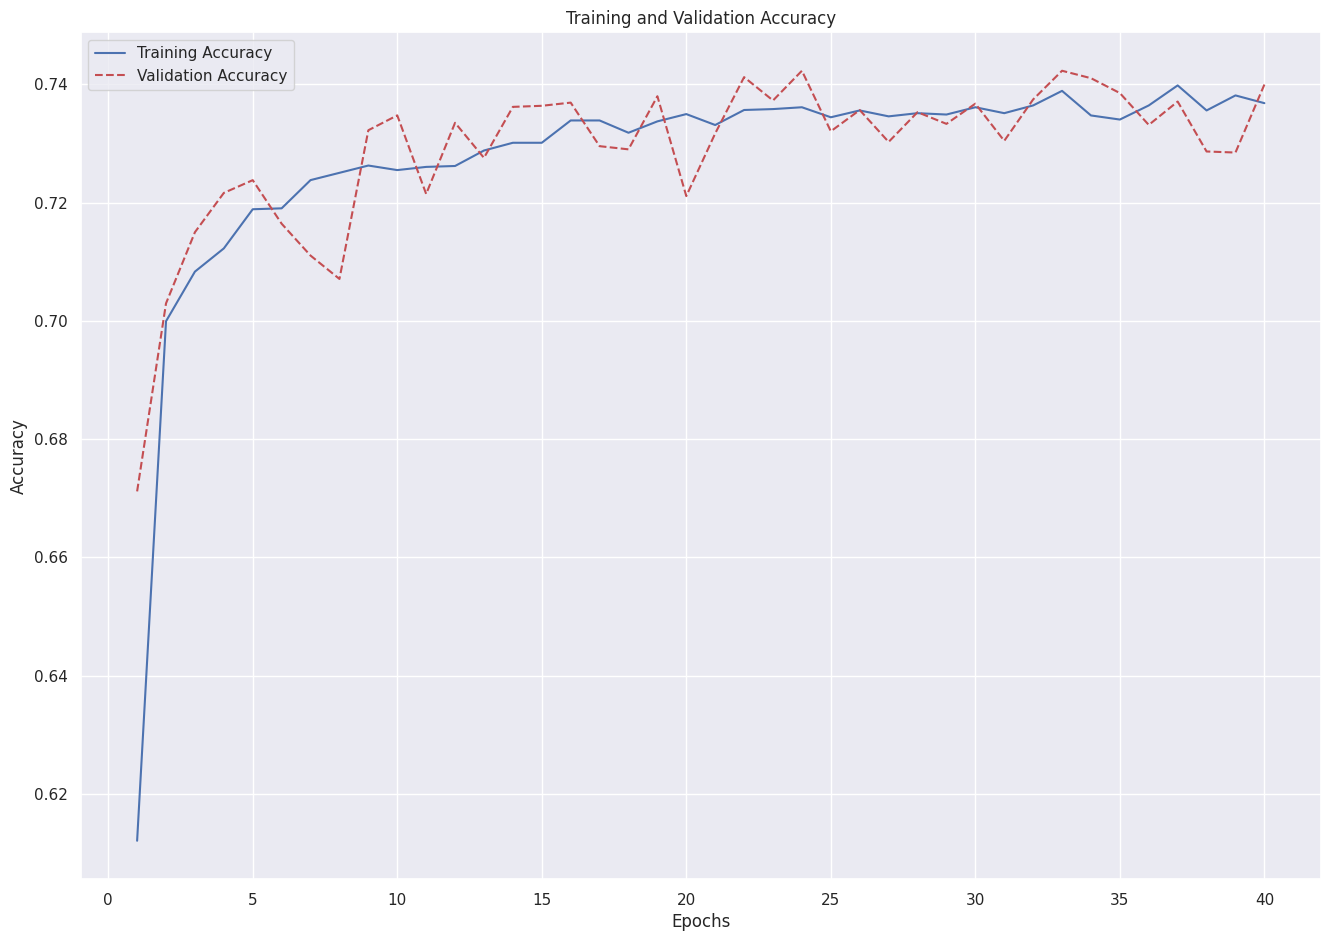

In [ ]:
import matplotlib.pyplot as plt
import time

# Salva il tempo di inzio dell'addestramento
start_time = time.time()

# Addestramento del modello
history = model.fit(X_train, y_train, epochs=40, batch_size=10, verbose=1, validation_data=(X_test, y_test))

# Salva il tempo di fine dell'addestramento e calcola la durata totale
end_time = time.time()
nn_training_time = end_time - start_time

# Stampa il tempo totale di addestramento
print(f"Training time: {nn_training_time} secondi")

# Valuta il modello sul set di test
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Stampa del grafico di training e validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Estrazione dell'accuratezza di training e di validation
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(train_accuracy) + 1)

# Stampa il grafico del training e validation accuracy
plt.plot(epochs, train_accuracy, 'b-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r--', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In questa sezione di codice vengono stampate le performance del modello attraverso i report di classificazione sia per il set di addestramento che per il set di test.

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Ottenere le previsioni per il set di test
y_pred_test = model.predict(X_test)

# Arrotondare le previsioni per ottenere una previsione binaria
y_pred_test_bin = np.round(y_pred_test)

# Ottenere le previsioni per il set di train
y_pred_train = model.predict(X_train)

# Arrotondare le previsioni per ottenere una previsione binaria
y_pred_train_bin = np.round(y_pred_train)

print("Prestazioni sul Set di Addestramento:")
print(classification_report(y_train, y_pred_train_bin))

print("Prestazioni sul Set di Test:")
print(classification_report(y_test, y_pred_test_bin))

406/406 [==============================] - 1s 1ms/step
Prestazioni sul Set di Addestramento:
              precision    recall  f1-score   support

           0       0.77      0.67      0.72      6413
           1       0.71      0.81      0.76      6577

    accuracy                           0.74     12990
   macro avg       0.74      0.74      0.74     12990
weighted avg       0.74      0.74      0.74     12990

Prestazioni sul Set di Test:
              precision    recall  f1-score   support

           0       0.77      0.67      0.72      2736
           1       0.72      0.81      0.76      2832

    accuracy                           0.74      5568
   macro avg       0.74      0.74      0.74      5568
weighted avg       0.74      0.74      0.74      5568



In questo blocco di codice viene calcolata la matrice di confusione

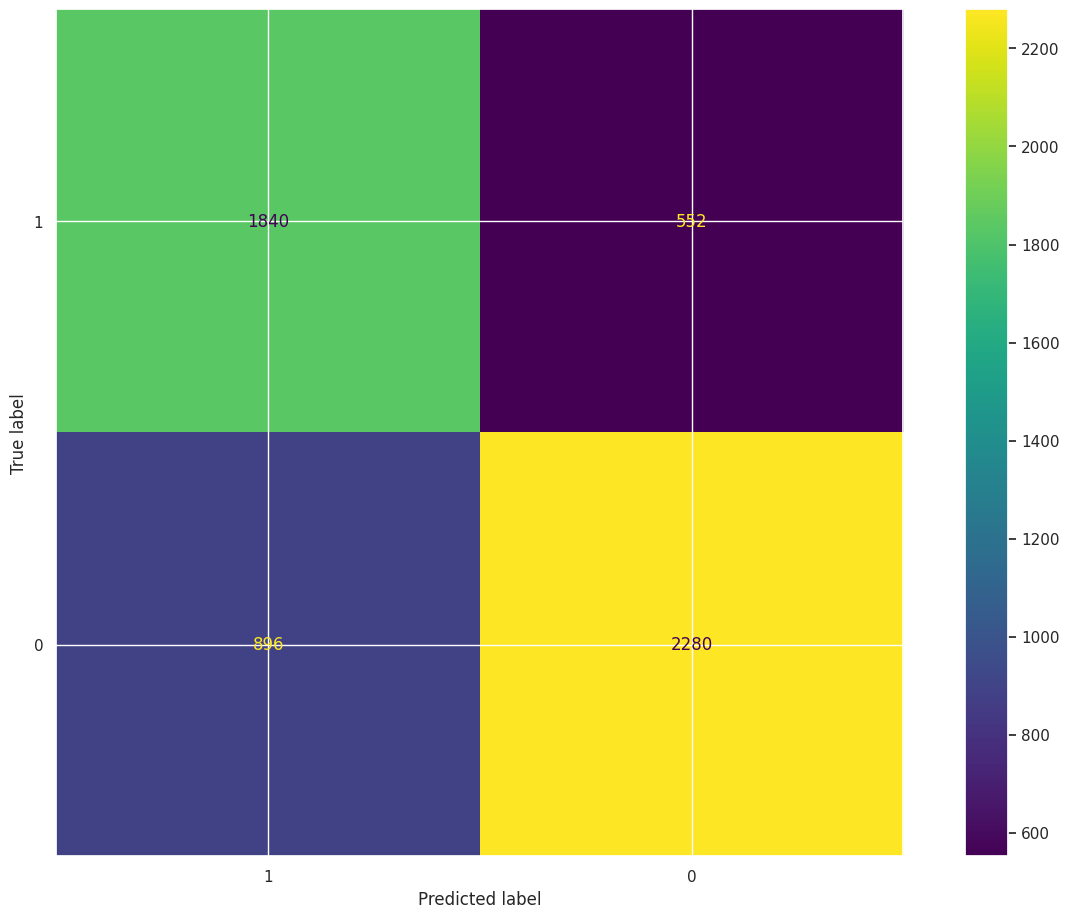

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Calcolo della matrice di confusione
cm = confusion_matrix(y_pred_test_bin, y_test)
labels = [1,0]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

In questo blocco di codice viene calcolata la curva ROC e l'Area Under Curve (AUC)

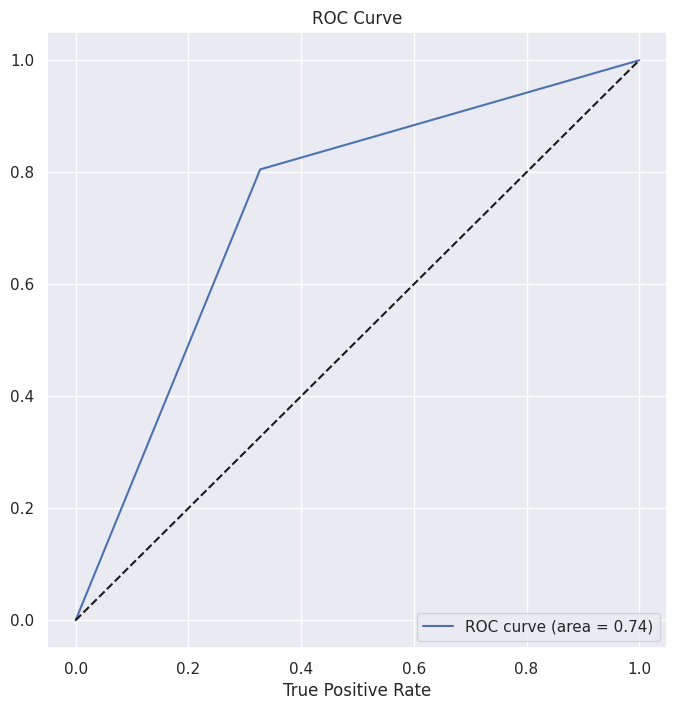

In [ ]:

from sklearn.metrics import roc_curve, roc_auc_score

# Calcolo della curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_bin)

# Calcolo Area Under the Curve (AUC)
roc_auc = roc_auc_score(y_test, y_pred_test_bin)

# Stampa curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In questa sezione di codice viene implementata la k-fold cross validation con k fissato a 10. E' importante notare che, a differenza dell'addestramento della rete neurale iniziale, durante la k-fold cross validation, il modello viene riaddestrato da ciascuna iterazione. Tale approccio richiede un maggior tempo di esecuzione rispetto all'addestramento singolo della rete nuerale, ma fornisce una valutazione più affidabile.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# Fissato il numero di fold e creato un oggetto KFold per la gestione della cross validation
n_fold = 10
folds = KFold(n_splits=n_fold, shuffle=True, random_state=42)

# Lista per salvare le accuratezze di ogni fold
accuracy_k_fold_nn = []

for n_fold, (train_idx, valid_idx) in enumerate(folds.split(X_train, y_train)):
    X_train_fold, X_valid_fold = X_train.iloc[train_idx], X_train.iloc[valid_idx]
    y_train_fold, y_valid_fold = y_train.iloc[train_idx], y_train.iloc[valid_idx]

    # Addestramento del modello
    model.fit(X_train_fold, y_train_fold, epochs=40, batch_size=10, verbose=0)

    # Otteniamo delle previsioni sul set di validazione
    y_valid_pred_prob = model.predict(X_valid_fold)
    y_valid_pred = np.round(y_valid_pred_prob)

    # Calcolo e salvataggio dell'accuratezza del fold corrente
    accuracy_k_fold_nn.append(accuracy_score(y_valid_fold, y_valid_pred))

41/41 [==============================] - 0s 2ms/step


In [ ]:
# Stampa delle accuratezze
accuracy_k_fold_nn

[0.7251732101616628,
 0.7351809083910701,
 0.737490377213241,
 0.7267128560431101,
 0.7236335642802155,
 0.7498075442648191,
 0.7344110854503464,
 0.7575057736720554,
 0.7228637413394919,
 0.7444187836797537]

Questo blocco di codice calcola l'intervallo di confidenza al 95% delle accuratezze ottenute durante la k-fold cross validation

In [ ]:
import scipy.stats as st
confidence_interval_nn = st.t.interval(confidence=0.95, df=len(accuracy_k_fold_nn)-1, loc=np.mean(accuracy_k_fold_nn), scale=st.sem(accuracy_k_fold_nn))
confidence_interval_nn

(0.727263583573923, 0.7441759853252303)

Questa sezione di codice stampa un grafico dell'accuratezza media ottenuta durante la k-fold cross validation, insieme all'intervallo di confidenza al 95%.

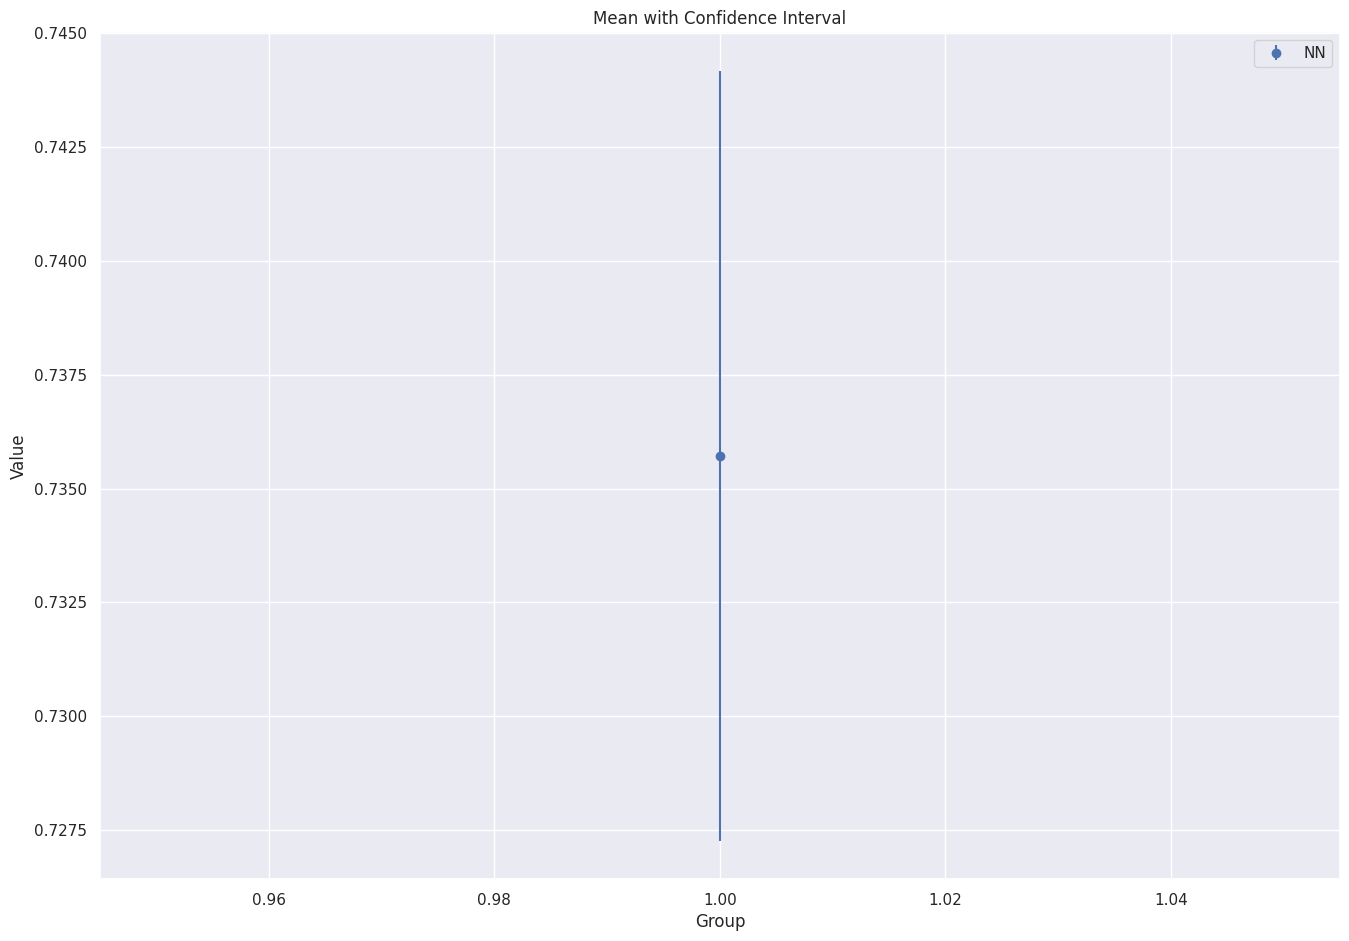

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Calcolo della media e dell'intervallo di confidenza su k-fold
mean_accuracy_nn = np.mean(accuracy_k_fold_nn)

# Stampa grafico della media e dell'intervallo di confidenza
plt.errorbar(1, mean_accuracy_nn, yerr=(confidence_interval_nn[1] - confidence_interval_nn[0])/2, fmt='o', label='NN')
plt.xlabel('Group')
plt.ylabel('Value')
plt.title('Mean with Confidence Interval')
plt.legend()
plt.show()

# Naive Bayes

Categorizzazione delle features numeriche

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay


def categorize_bmi(bmi):
    if bmi < 19:
        return "Underweight"
    elif 19 <= bmi < 25:
        return "Normal"
    elif 25 <= bmi < 30:
        return "Overweight"
    elif 30 <= bmi < 35:
        return "Obese"
    else:
        return "Extreme Obese"


def categorize_illness_days(days):
    if days == 0:
        return "None"
    elif days <= 7:
        return "Low"
    elif days <= 14:
        return "Medium"
    else:
        return "High"

sampled_df['BMI'] = sampled_df['BMI'].apply(categorize_bmi)
sampled_df['PhysHlth'] = sampled_df['PhysHlth'].apply(categorize_illness_days)


label_encoder = LabelEncoder()
sampled_df['PhysHlth'] = label_encoder.fit_transform(sampled_df['PhysHlth'])
sampled_df['BMI'] = label_encoder.fit_transform(sampled_df['BMI'])

Addestramento del modello

In [ ]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import time

# Split the dataset into features (X) and target variable (y)
X = sampled_df.drop(columns=['Diabetes'])
y = sampled_df['Diabetes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Categorical Naive Bayes classifier
cnb = CategoricalNB()

# Measure the start time
start_time = time.time()

# Train the Categorical Naive Bayes classifier
cnb.fit(X_train, y_train)

# Measure the end time
end_time = time.time()

# Calculate the training time
nb_training_time = end_time - start_time

# Evaluate the model on training data
y_train_pred = cnb.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_classification_report = classification_report(y_train, y_train_pred)

# Evaluate the model on testing data
y_prob = cnb.predict(X_test)
test_accuracy = accuracy_score(y_test, y_prob)
test_classification_report = classification_report(y_test, y_prob)

# Print training results
print("Training Results:")
print(f"Training Time Naive Bayes: {nb_training_time:.3f} seconds")
print(f"Training Accuracy: {train_accuracy:.4f}")
print("Classification Report on Training Data:\n", train_classification_report)

# Print testing results
print("\nTesting Results:")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print("Classification Report on Testing Data:\n", test_classification_report)


Training Results:
Training Time Naive Bayes: 0.012 seconds
Training Accuracy: 0.7325
Classification Report on Training Data:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73      6413
           1       0.73      0.74      0.74      6577

    accuracy                           0.73     12990
   macro avg       0.73      0.73      0.73     12990
weighted avg       0.73      0.73      0.73     12990


Testing Results:
Testing Accuracy: 0.7284
Classification Report on Testing Data:
               precision    recall  f1-score   support

           0       0.72      0.73      0.73      2736
           1       0.74      0.73      0.73      2832

    accuracy                           0.73      5568
   macro avg       0.73      0.73      0.73      5568
weighted avg       0.73      0.73      0.73      5568



Matrice di confusione

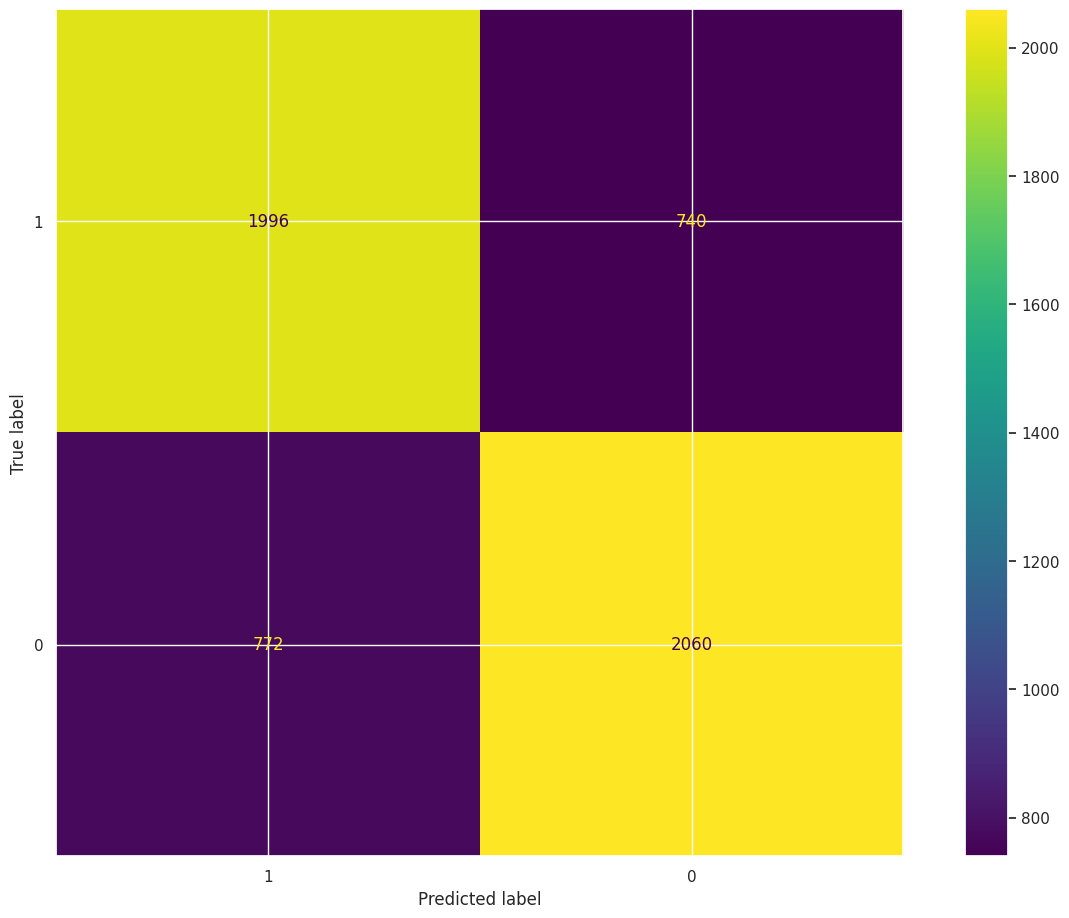

In [ ]:
cm = confusion_matrix(y_test,y_prob)
labels = [1,0]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();

Presentazione Curva ROC

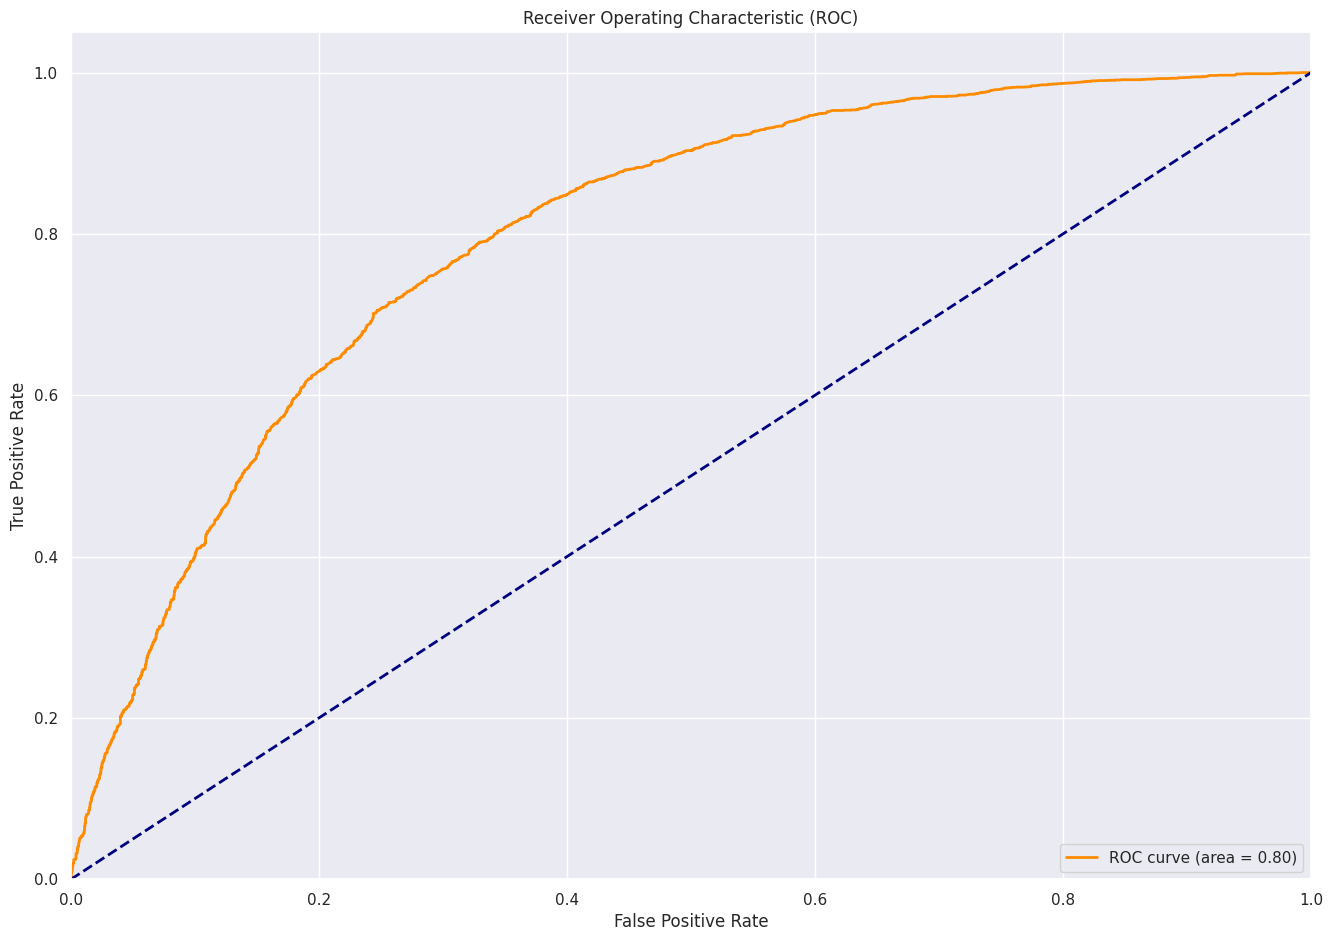

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, f1_score

y_probs = cnb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

10-Fold Cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

n_fold = 10
folds = KFold(n_splits=n_fold, shuffle=True)

accuracy_k_fold_nb = []

for n_fold, (train_idx, valid_idx) in enumerate(folds.split(X_train, y_train)):
    X_train_fold, X_valid_fold = X_train.iloc[train_idx], X_train.iloc[valid_idx]
    y_train_fold, y_valid_fold = y_train.iloc[train_idx], y_train.iloc[valid_idx]

    cnb = CategoricalNB()
    cnb.fit(X_train_fold, y_train_fold)
    # Fai previsioni sul set di validazione e calcola l'accuratezza
    y_valid_pred = cnb.predict(X_valid_fold)
    accuracy_k_fold_nb.append(accuracy_score(y_valid_fold, y_valid_pred))

In [ ]:
accuracy_k_fold_nb

[0.7174749807544265,
 0.7336412625096228,
 0.7220939183987682,
 0.7267128560431101,
 0.7351809083910701,
 0.7336412625096228,
 0.7259430331023865,
 0.7351809083910701,
 0.7451886066204773,
 0.7428791377983064]

In [ ]:
import numpy as np
import scipy.stats as st
confidence_interval_nb = st.t.interval(confidence=0.90, df=len(accuracy_k_fold_nb)-1, loc=np.mean(accuracy_k_fold_nb), scale=st.sem(accuracy_k_fold_nb))
confidence_interval_nb

(0.7267134668533078, 0.7368739080504642)

Intervallo di confidenza per la metrica di accuratezza

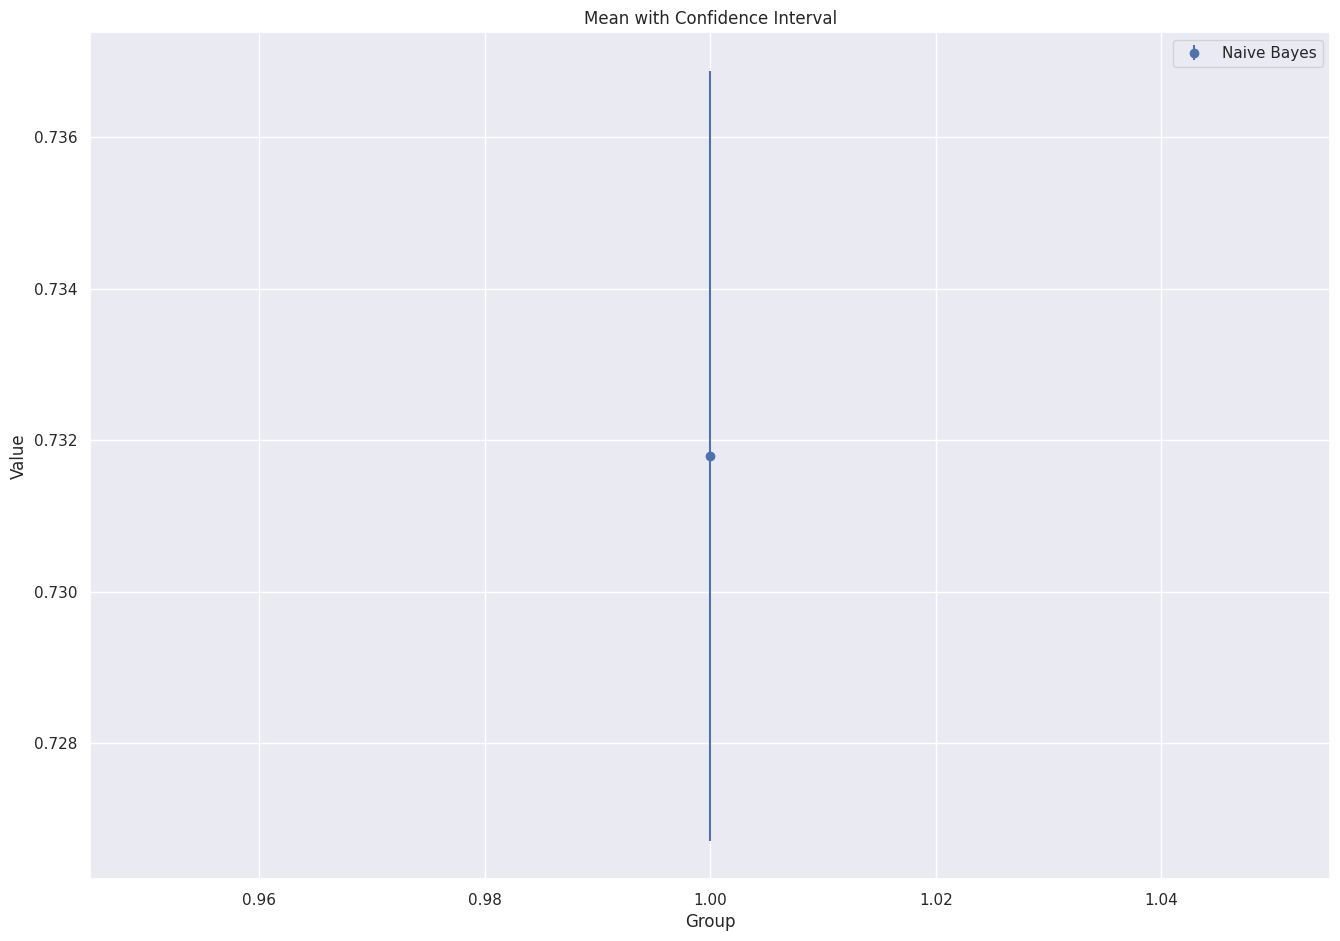

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# Calculate mean and confidence interval on k-fold
mean_accuracy_nb = np.mean(accuracy_k_fold_nb)
# Plot the mean and confidence interval
plt.errorbar(1, mean_accuracy_nb, yerr=(confidence_interval_nb[1] - confidence_interval_nb[0])/2, fmt='o', label='Naive Bayes')
# Add labels and title
plt.xlabel('Group')
plt.ylabel('Value')
plt.title('Mean with Confidence Interval')
# Show the plot
plt.legend()
plt.show()

# Conclusioni


## Confronto Curve ROC

Questo codice è finalizzato al confronto delle curve ROC dei tre modelli: Decision Tree, Reti Neurali e Naive Bayes

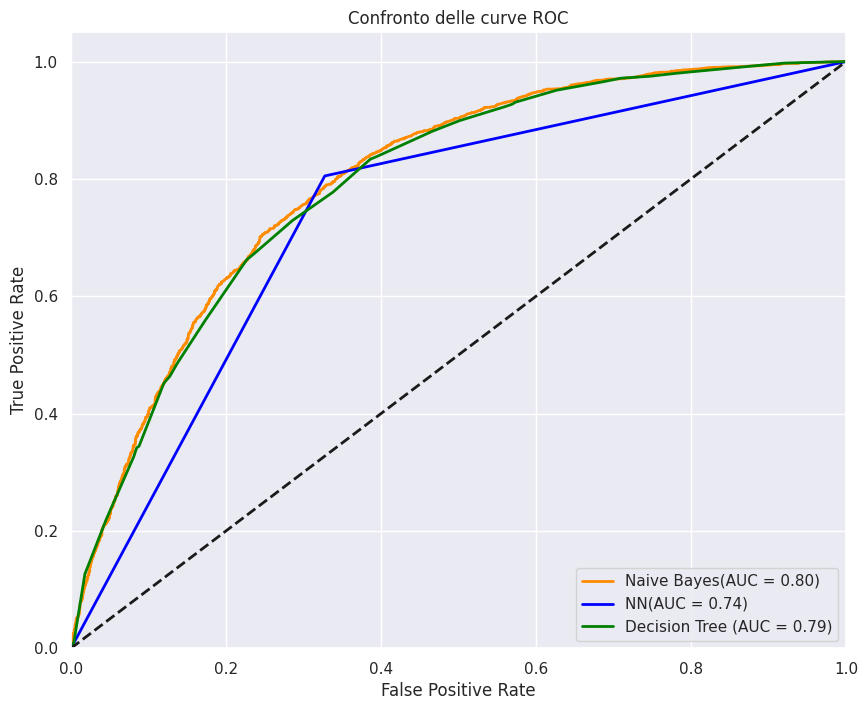

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calcolo della curva ROC per ogni modello
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_probs)
roc_auc1 = roc_auc_score(y_test, y_probs)

fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_test_bin)
roc_auc2 = roc_auc_score(y_test, y_pred_test_bin)

fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred_prob)
roc_auc3 = roc_auc_score(y_test, y_pred_prob)

# Plot delle curve ROC
plt.figure(figsize=(10, 8))

# Modello 1 - Naive Bayes
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label='Naive Bayes(AUC = %0.2f)' % roc_auc1)

# Modello 2 - Rete Neurale
plt.plot(fpr2, tpr2, color='blue', lw=2, label='NN(AUC = %0.2f)' % roc_auc2)

# Modello 3 - Decision Tree
plt.plot(fpr3, tpr3, color='green', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc3)

# Linea di riferimento
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Impostazioni del grafico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Confronto delle curve ROC')
plt.legend(loc="lower right")

# Mostra il grafico
plt.show()


# Confronto Intervalli di confidenza

Questo blocco di codice crea un grafico che rappresenta la media con intervallo di confidenza per i tre modelli: Decision Tree, Reti Neurali e Naive Bayes

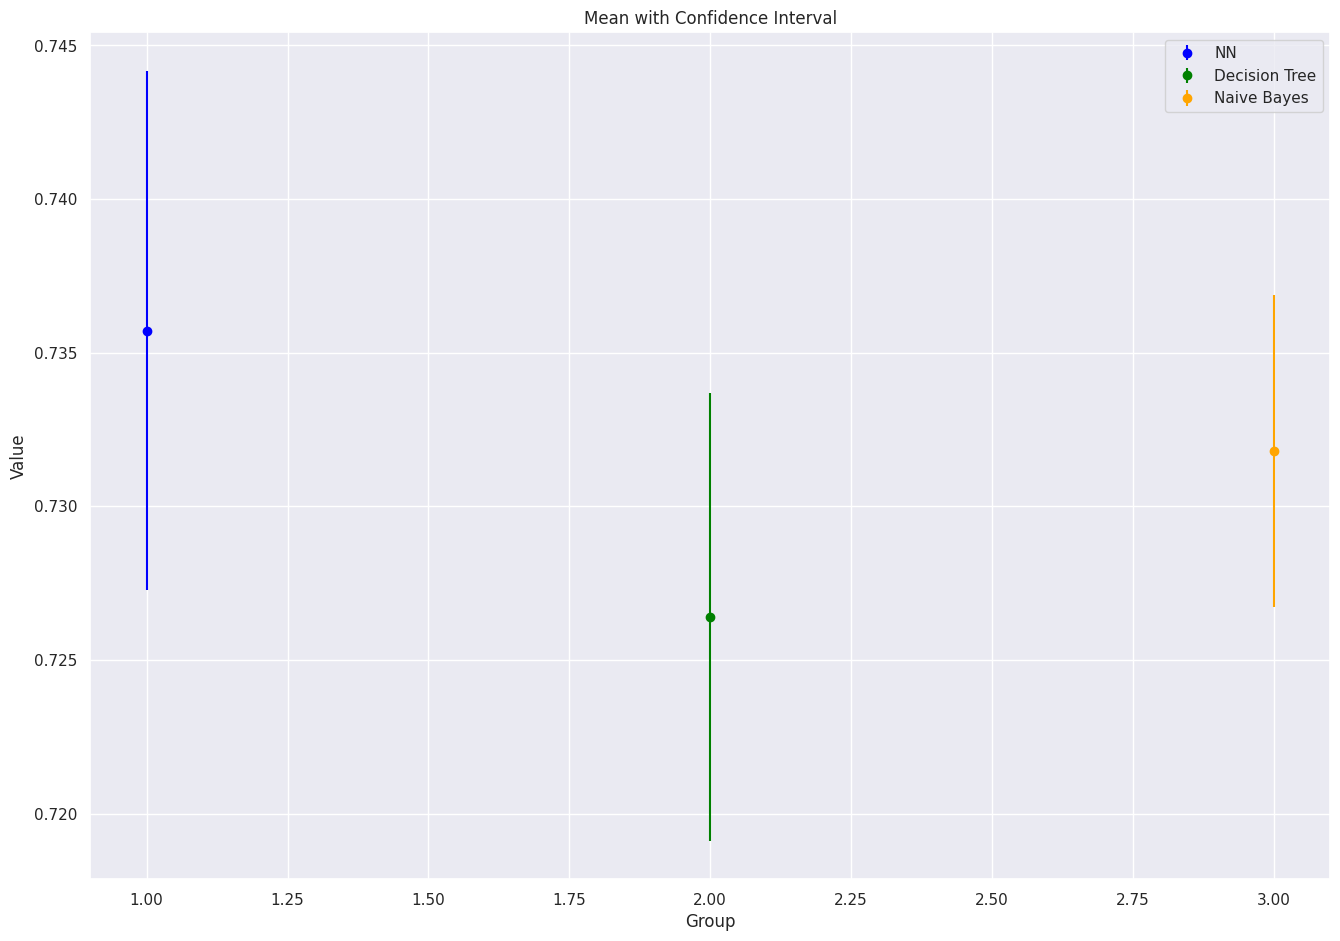

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Calcolo della media e dell'intervallo di confidenza per ogni modello
plt.errorbar(1, mean_accuracy_nn, yerr=(confidence_interval_nn[1] - confidence_interval_nn[0])/2, fmt='o', label='NN', color='blue')
plt.errorbar(2, mean_accuracy_dt, yerr=(confidence_interval_dt[1] - confidence_interval_dt[0])/2, fmt='o', label='Decision Tree', color='green')
plt.errorbar(3, mean_accuracy_nb, yerr=(confidence_interval_nb[1] - confidence_interval_nb[0])/2, fmt='o', label='Naive Bayes', color='orange')

# Stampa il grafico
plt.xlabel('Group')
plt.ylabel('Value')
plt.title('Mean with Confidence Interval')
plt.legend()
plt.show()


# Tempi di esecuzione


Questo codice stampa i tempi di training dei tre modelli: Decision Tree, Reti Neurali e Naive Bayes

In [ ]:
print(f"Tempo di training Decision tree: {dt_training_time:.3f} secondi")
print(f"Tempo di training Neural Network: {nn_training_time:.3f} secondi")
print(f"Tempo di training Naive Bayes: {nb_training_time:.3f} secondi")

Tempo di training Decision tree: 0.016 secondi
Tempo di training Neural Network: 148.755 secondi
Tempo di training Naive Bayes: 0.012 secondi
